In [56]:
# Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

# from keras.optimizers import gradient_descent_v2
# plt.style.use('seaborn-whitegrid') 

In [57]:
# Import the statistic for all stocks
stockList = ["INTC", "PFE", "CMCSA", "SAP", "TMUS", "TMO", "AMD", "NVS", "LIN", "MCD", "NFLX", "AZN", "ACN", "CRM", "BABA", "FMX", "CSCO", "SHEL", "BAC", "PEP", "ABBV", "KO", "TM", "COST", "MRK", "ASML", "CVX", "ADBE", "HD", "ORCL", "JNJ", "PG", "MA", "AVGO", "XOM", "JPM", "WMT", "NVO", "UNH", "TSM", "V", "LLY", "TSLA", "BRK.B", "META", "NVDA", "AMZN", "GOOGL", "MSFT", "AAPL"]

In [58]:
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("Data/"+i+".csv", index_col="Date", parse_dates=["Date"])

In [59]:
def split(dataframe, border):
    return dataframe.loc[:border].copy(), dataframe.loc[border:].copy()

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2022-01-01")
    #if i == "AAPL":
        #print(df_new[i]["Train"])
        #print(df_new[i]["Test"])

In [60]:
for i in stockList:
    if i == "AAPL":
        fuck = np.array(df_new[i]["Train"])
        print(fuck)

[[2.89500008e+01 2.90825005e+01 2.86900005e+01 2.90375004e+01
  2.70237083e+01 1.15127600e+08]
 [2.89624996e+01 2.91275005e+01 2.89375000e+01 2.90049992e+01
  2.69934597e+01 8.44724000e+07]
 [2.89799995e+01 2.92150002e+01 2.89524994e+01 2.91525002e+01
  2.71307335e+01 8.87744000e+07]
 ...
 [1.79330002e+02 1.80630005e+02 1.78139999e+02 1.79380005e+02
  1.77353607e+02 6.23489000e+07]
 [1.79470001e+02 1.80570007e+02 1.78089996e+02 1.78199997e+02
  1.76186935e+02 5.97730000e+07]
 [1.78089996e+02 1.79229996e+02 1.77259995e+02 1.77570007e+02
  1.75564072e+02 6.40623000e+07]]


/var/folders/tt/rynv9sfx6hd7zsm3w8y6qv8c0000gn/T/ipykernel_46887/3595984756.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,4))


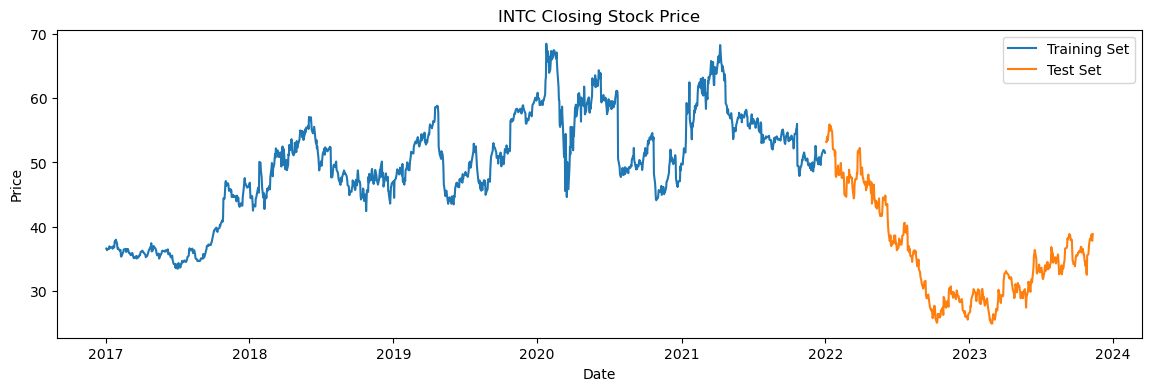

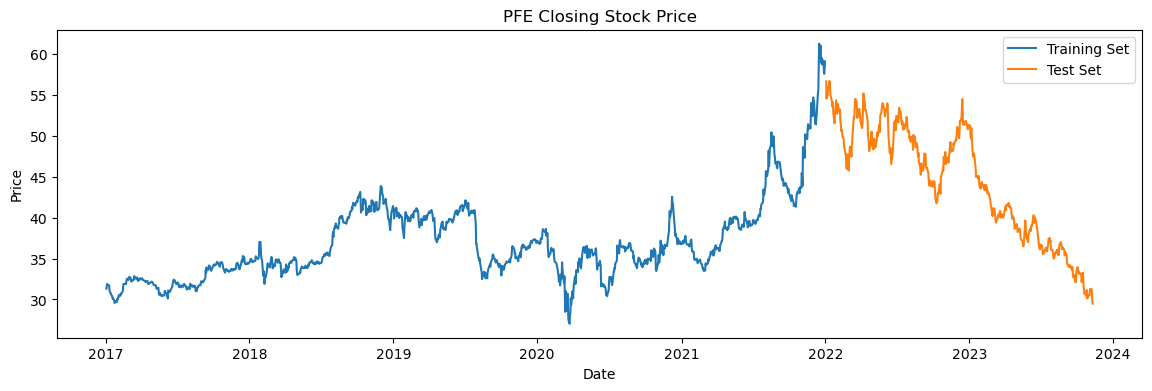

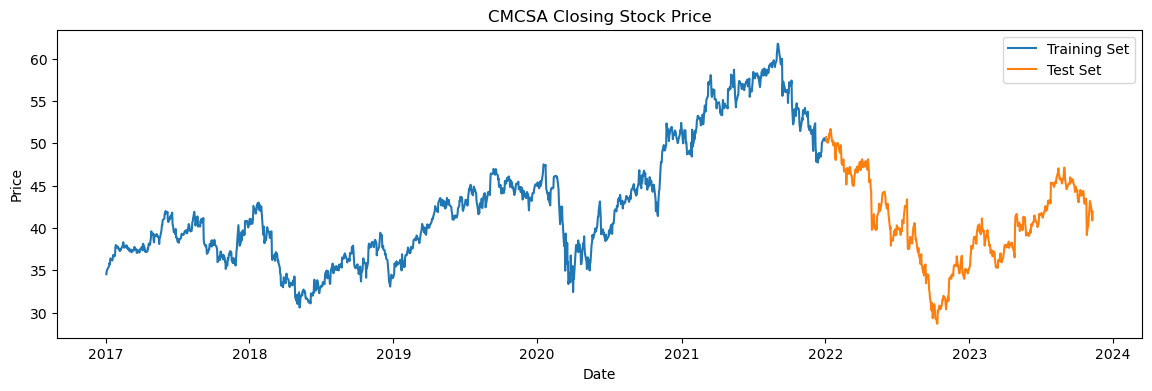

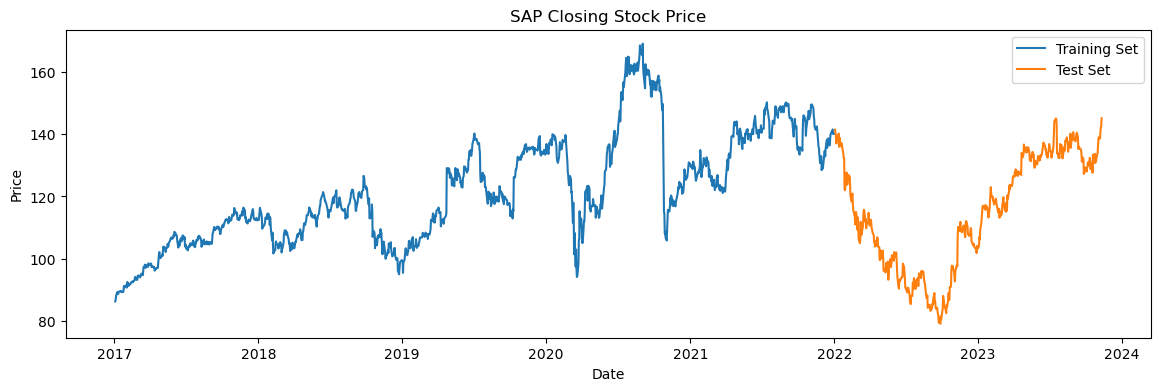

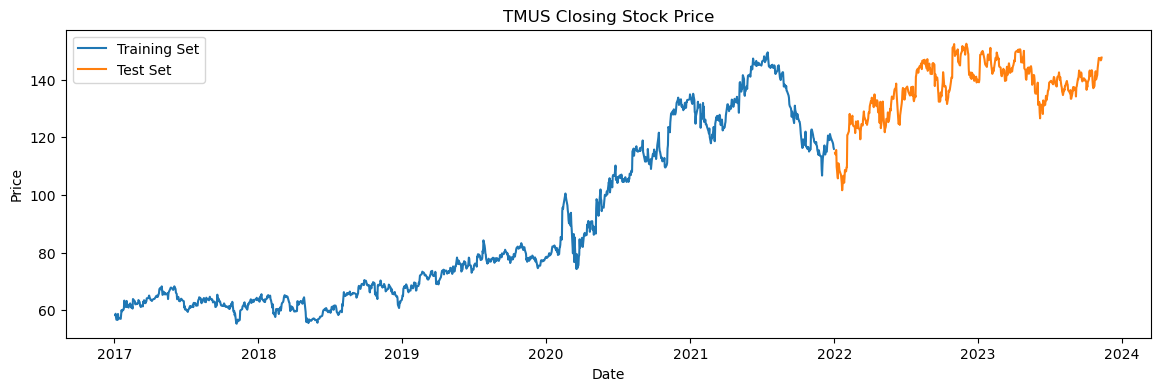

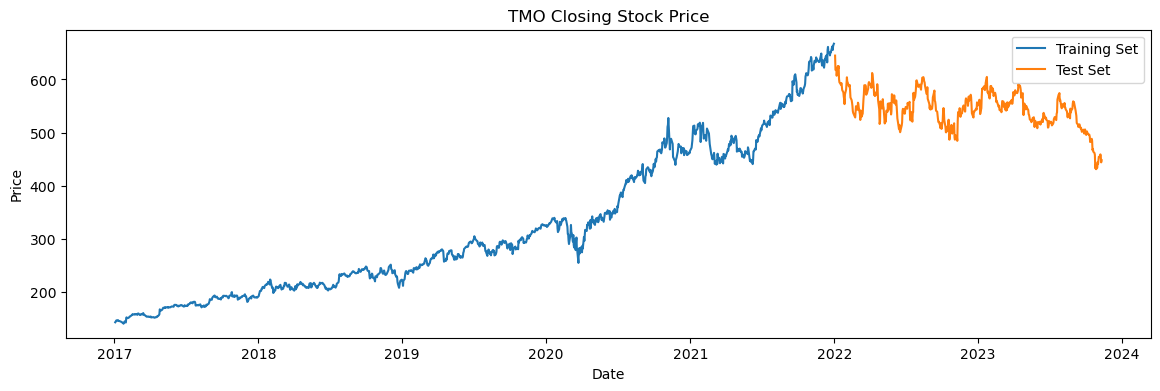

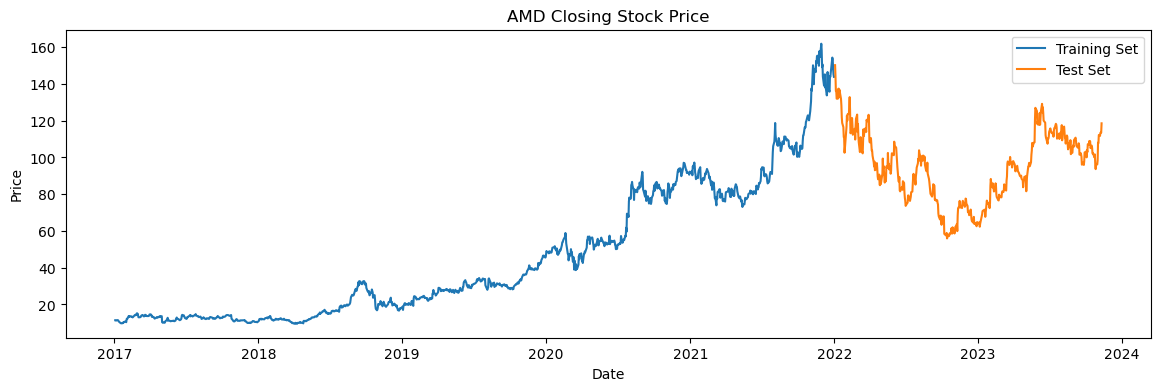

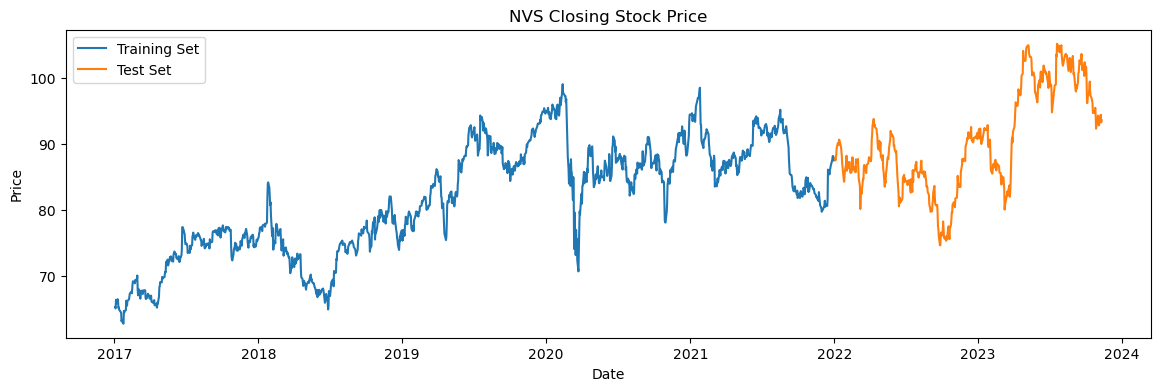

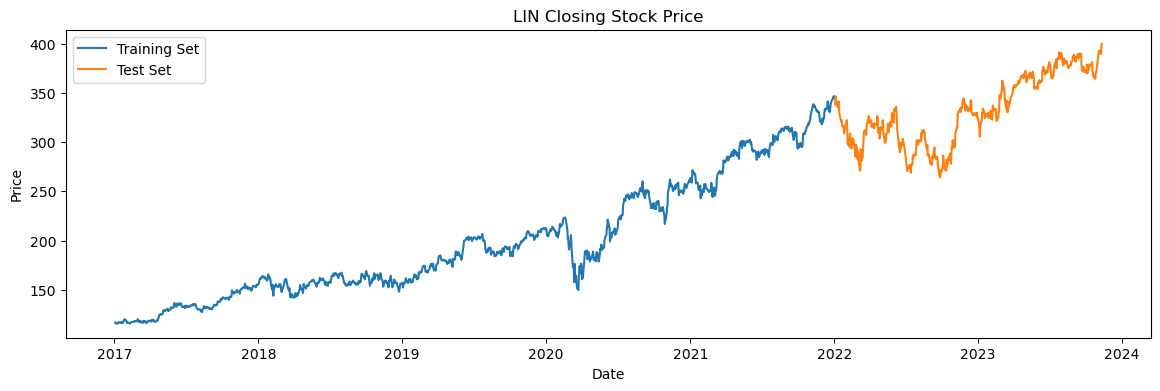

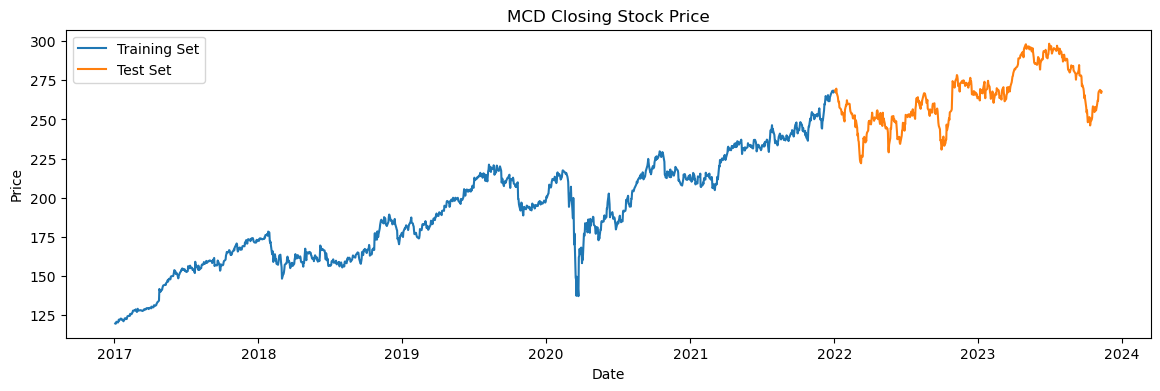

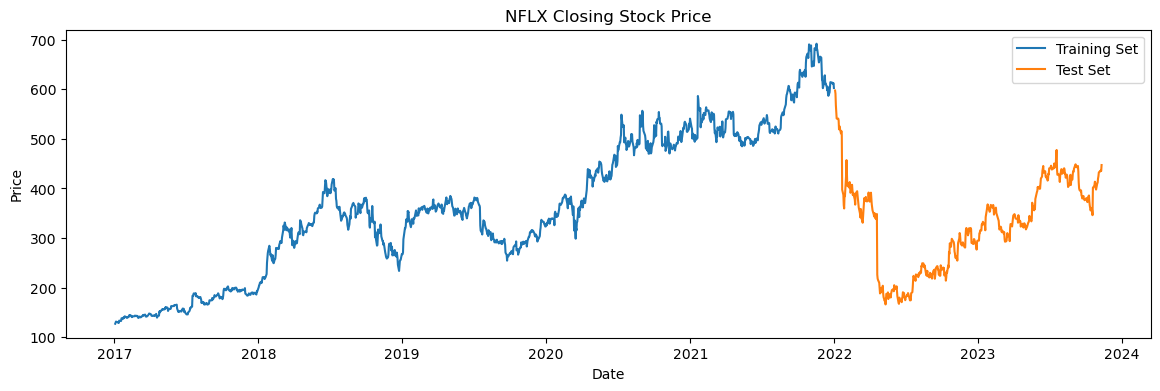

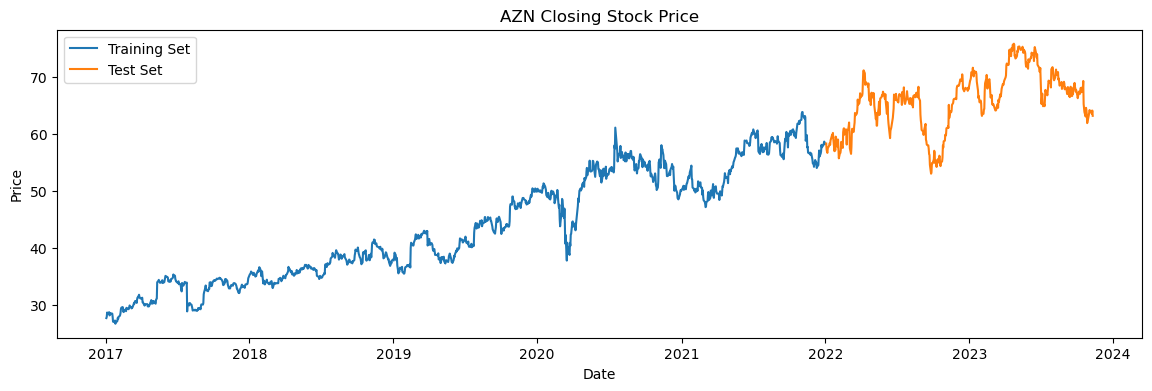

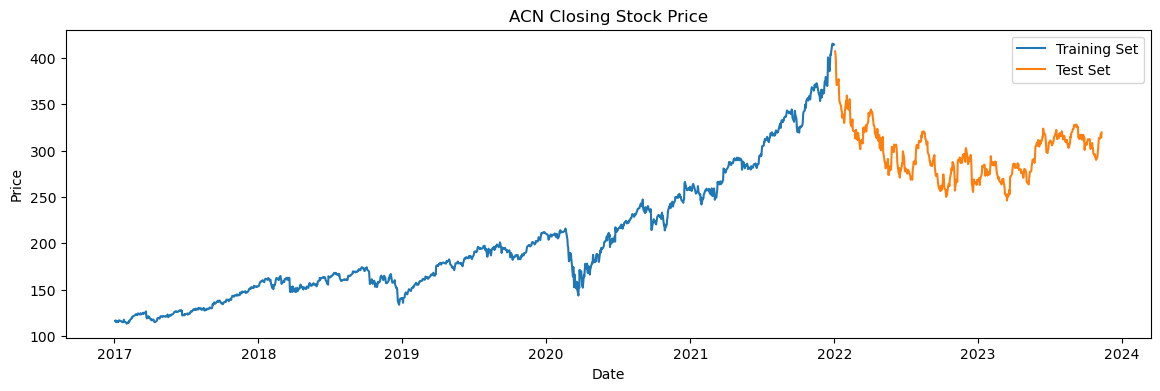

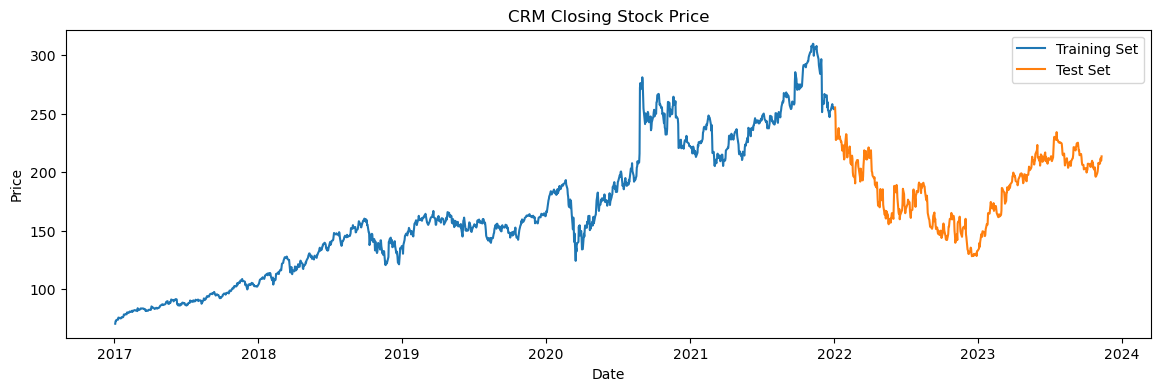

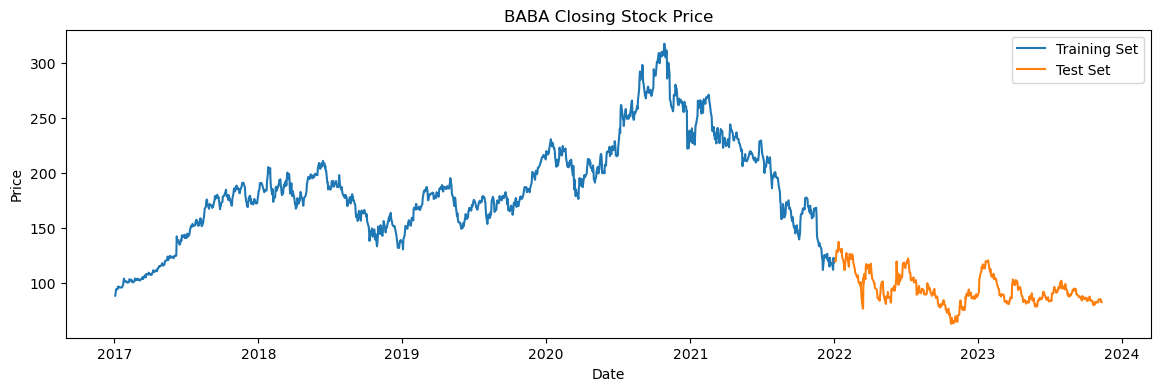

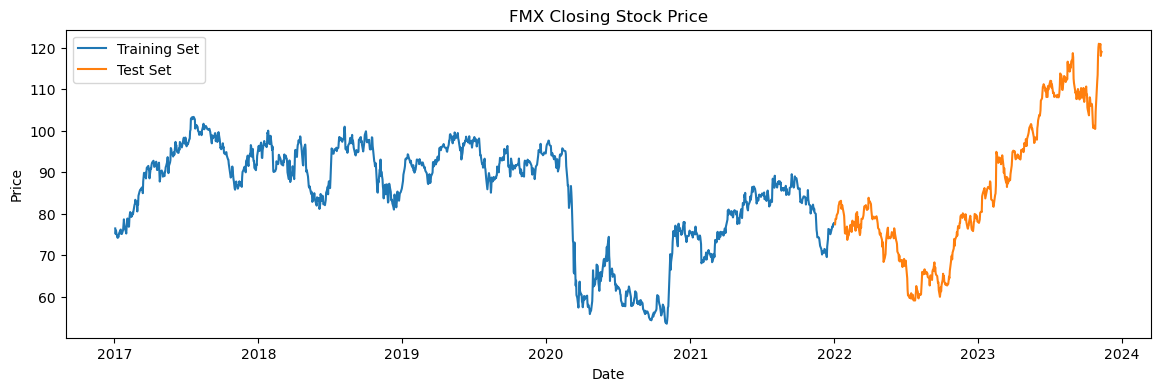

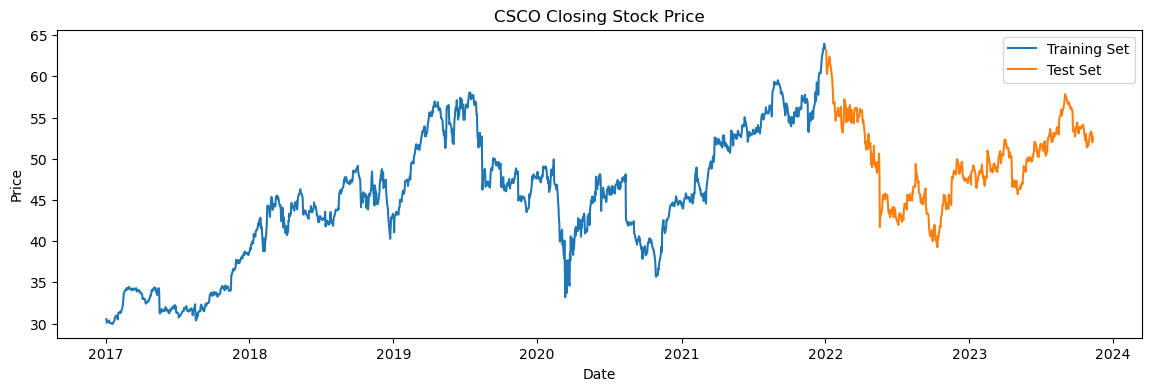

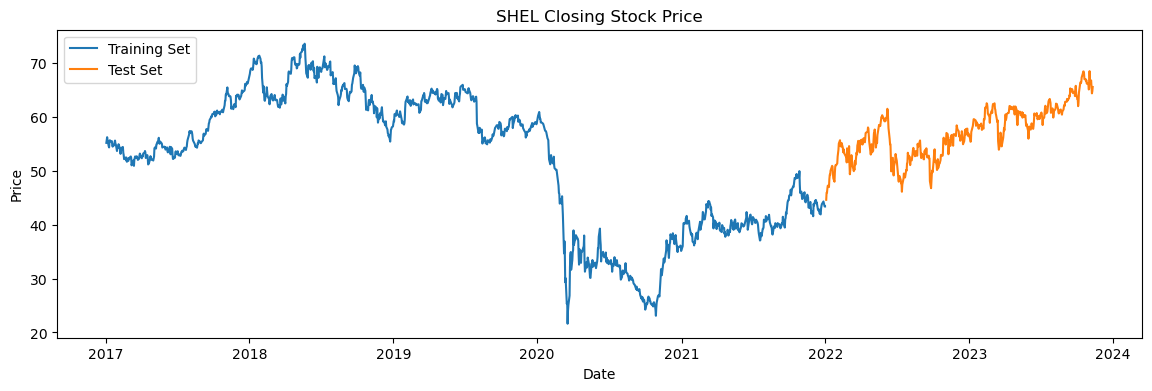

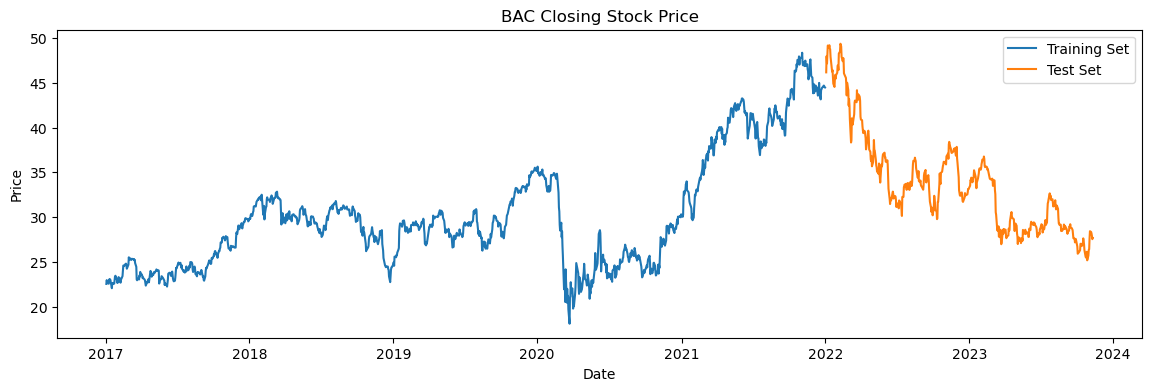

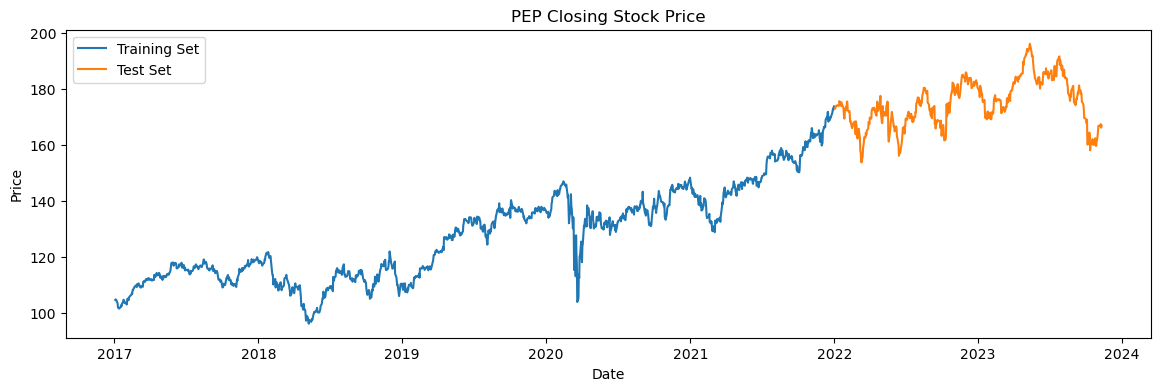

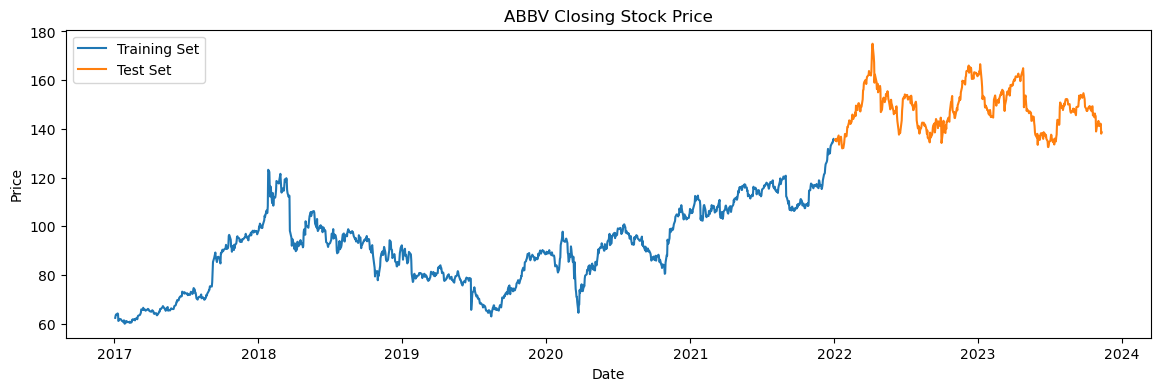

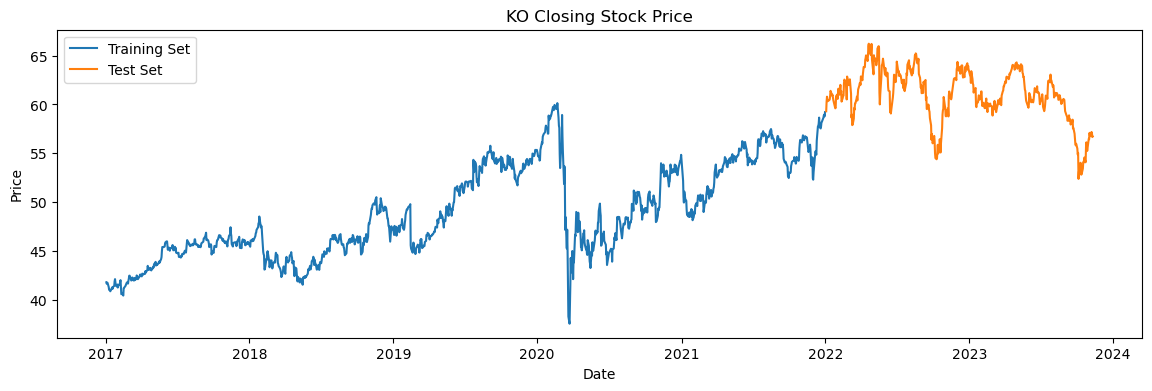

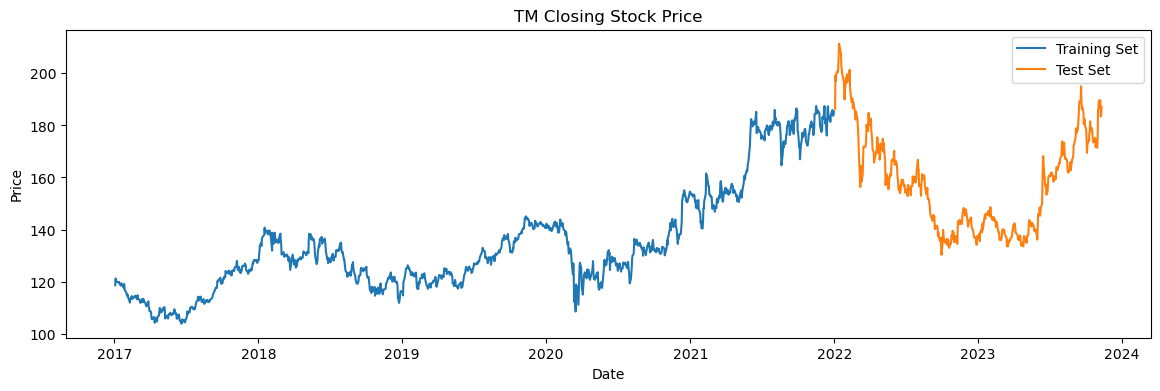

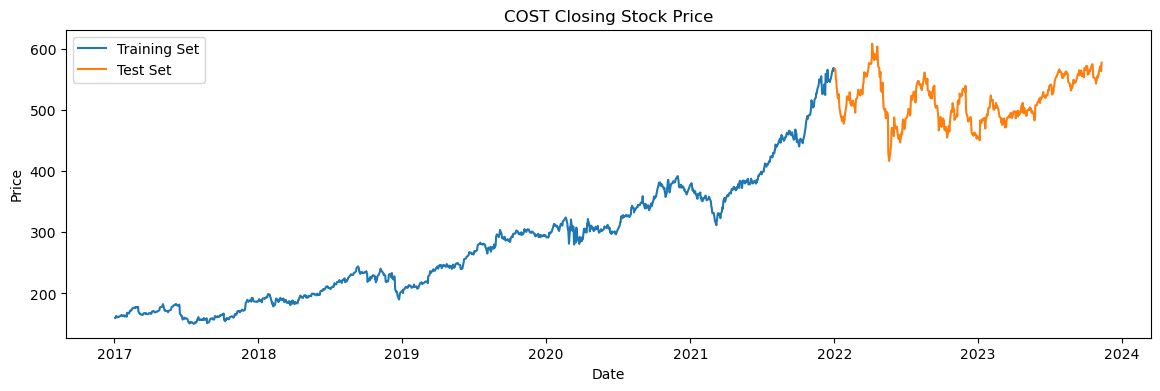

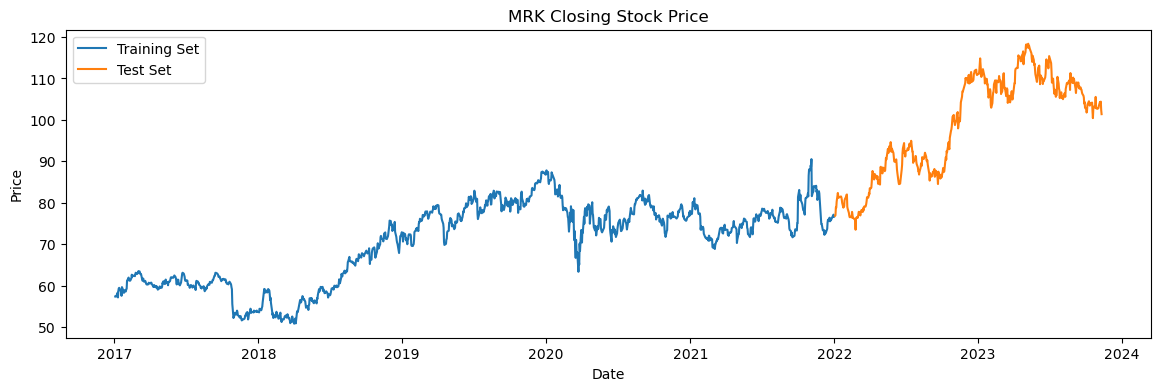

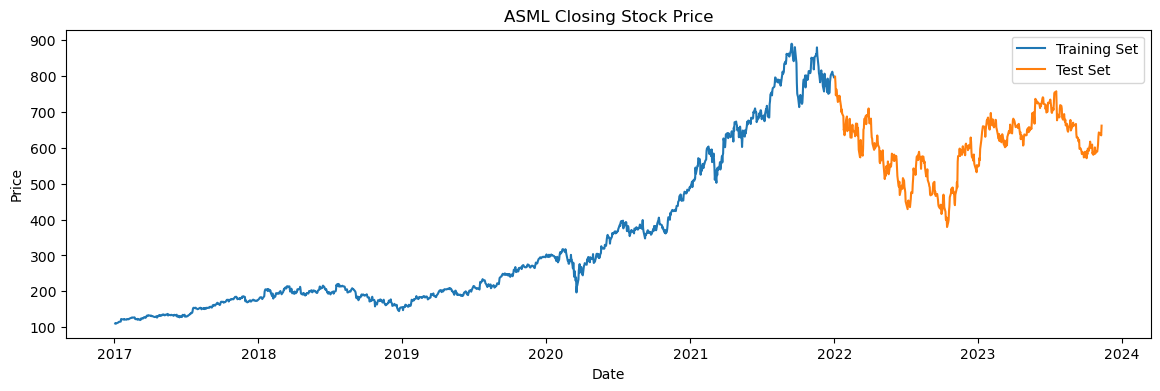

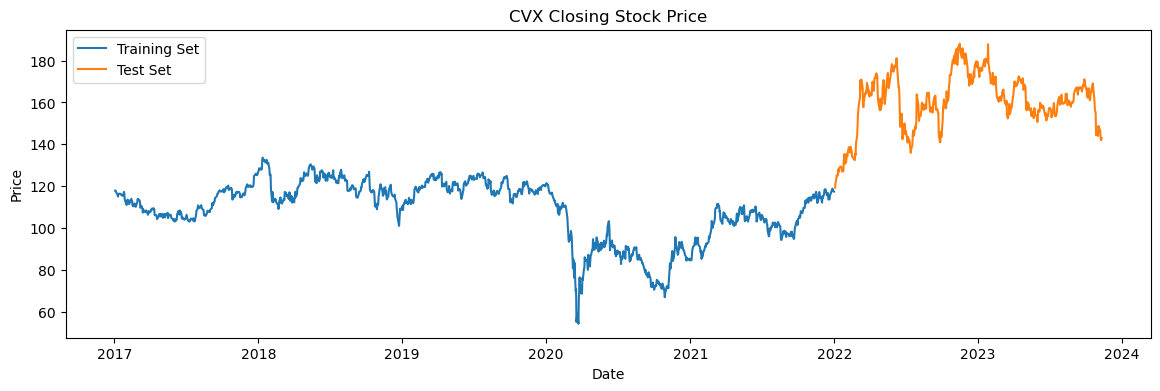

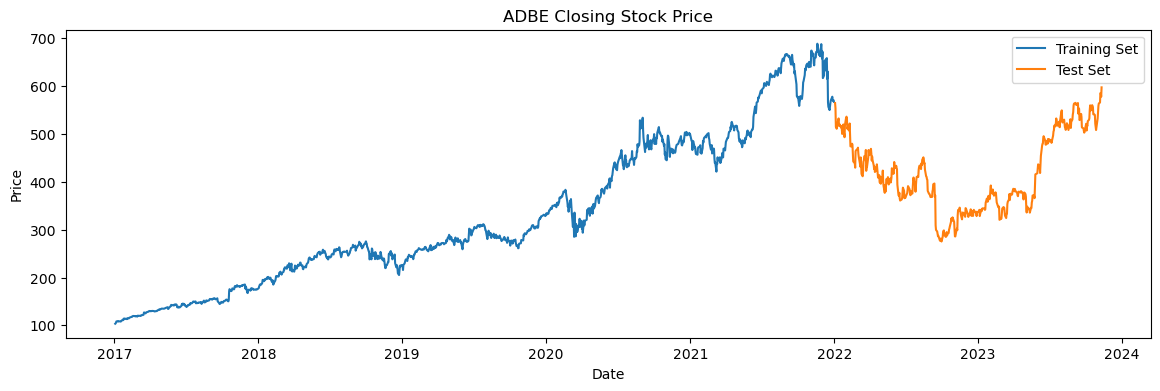

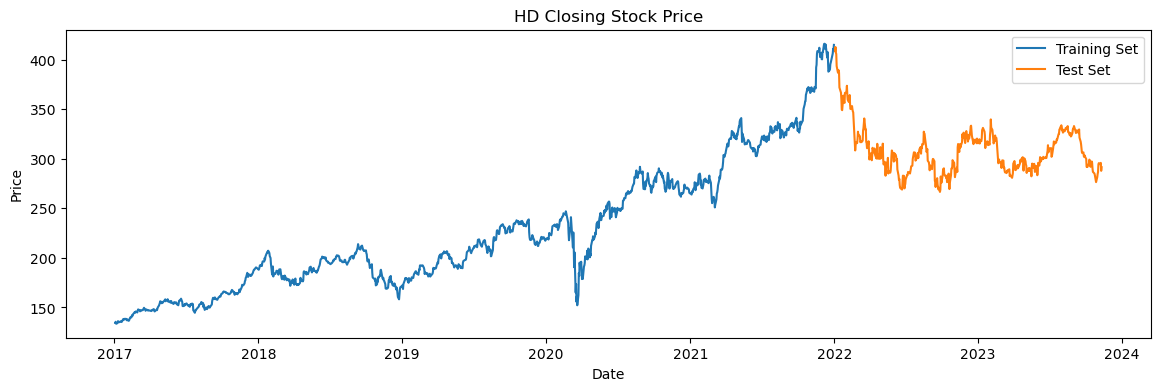

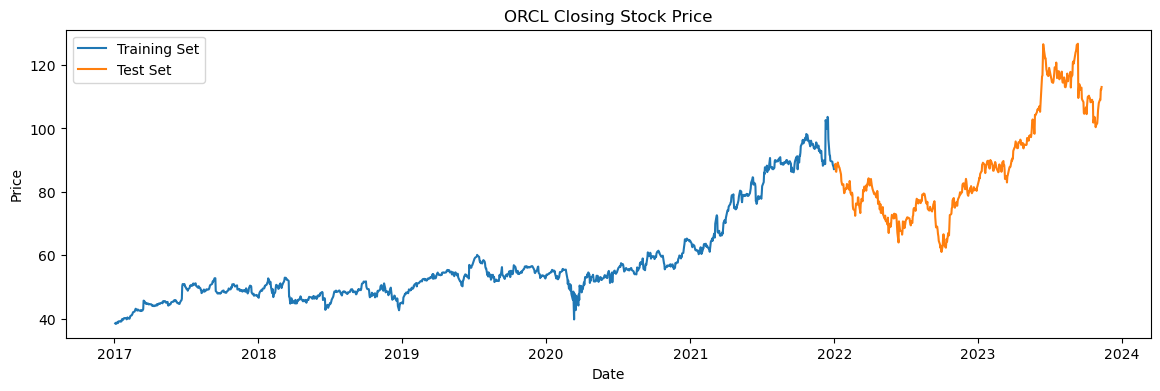

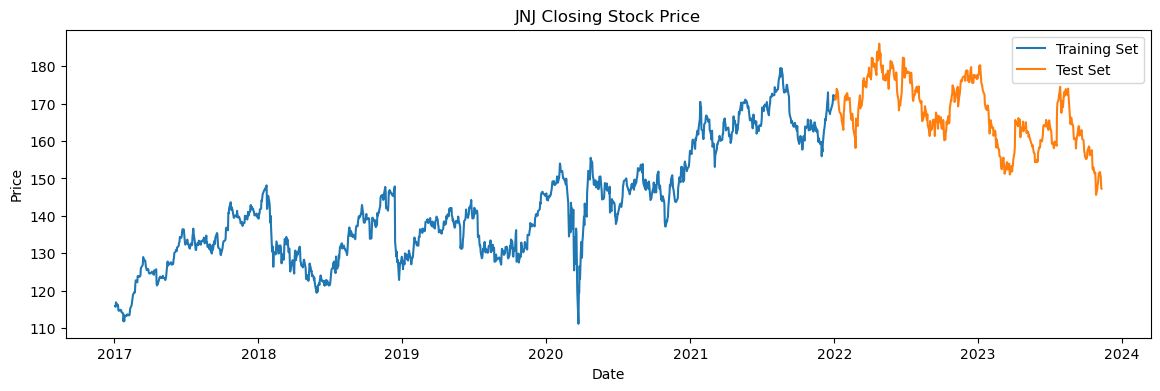

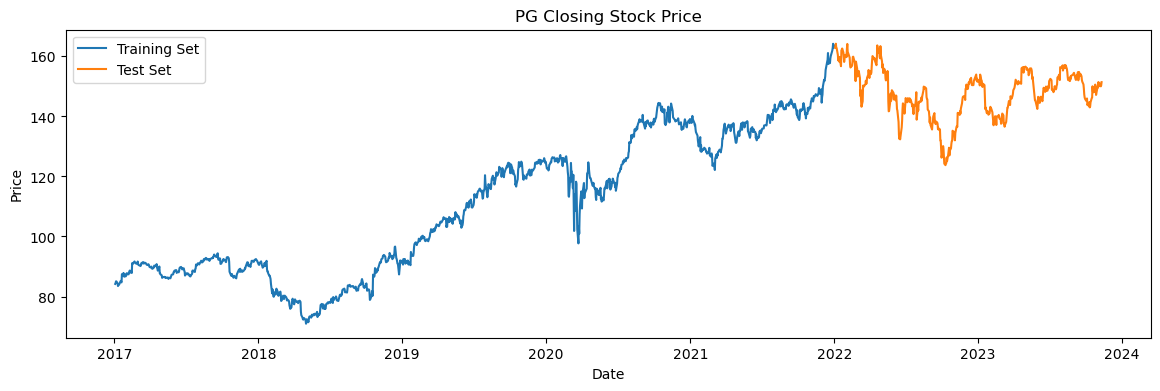

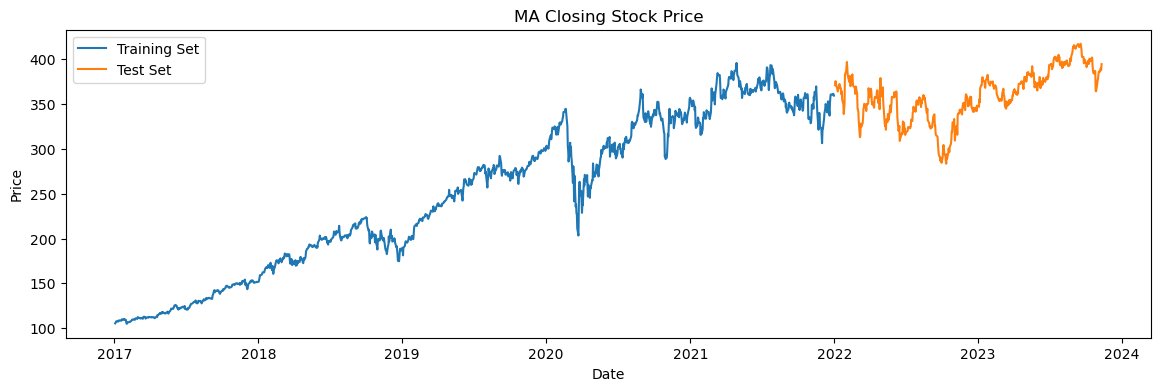

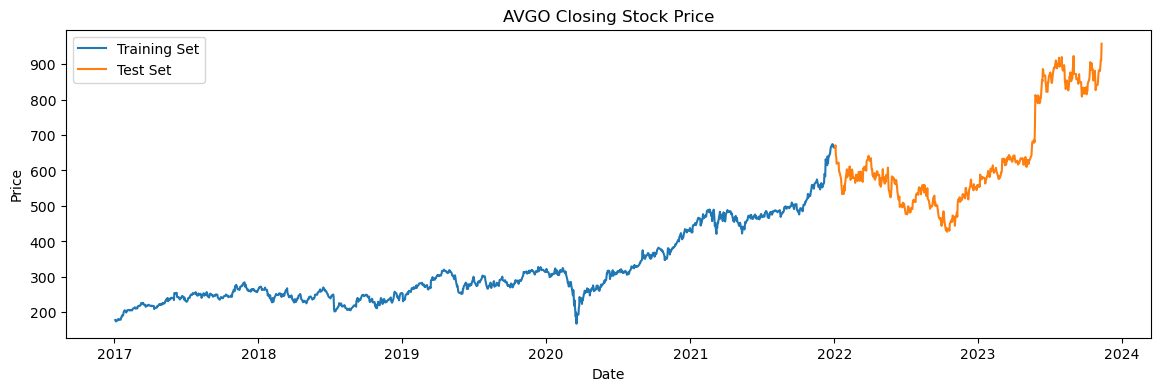

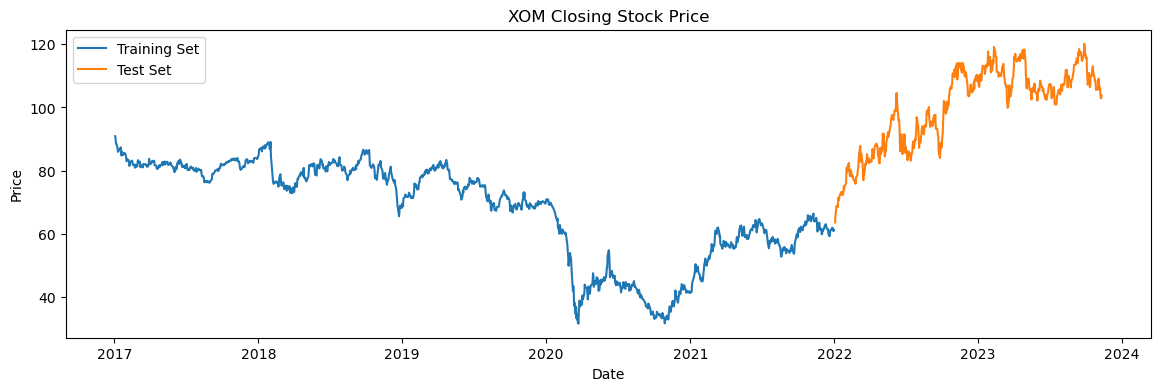

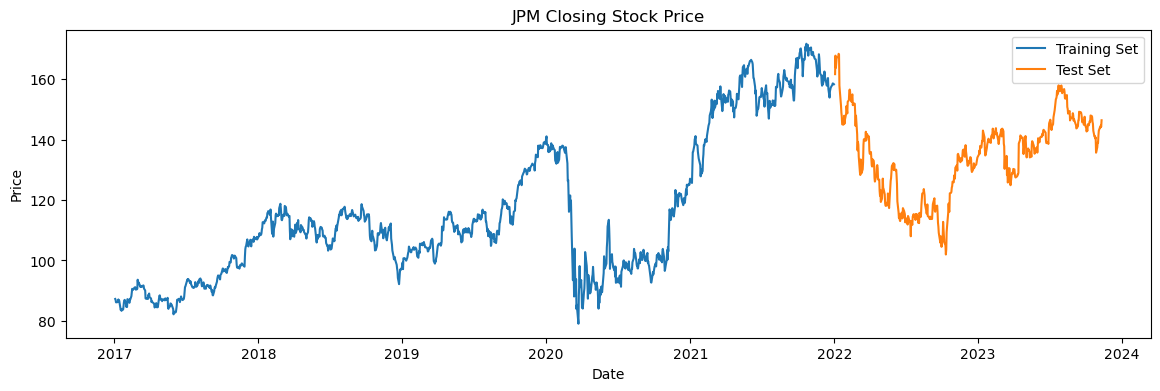

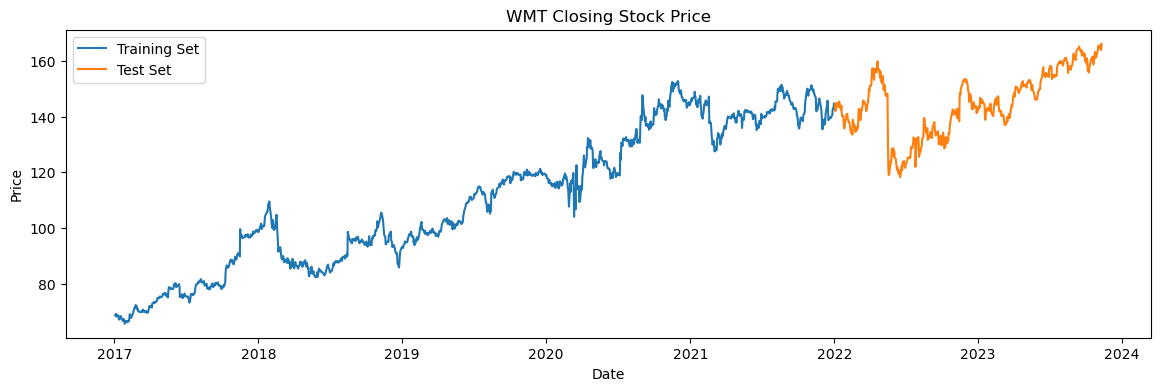

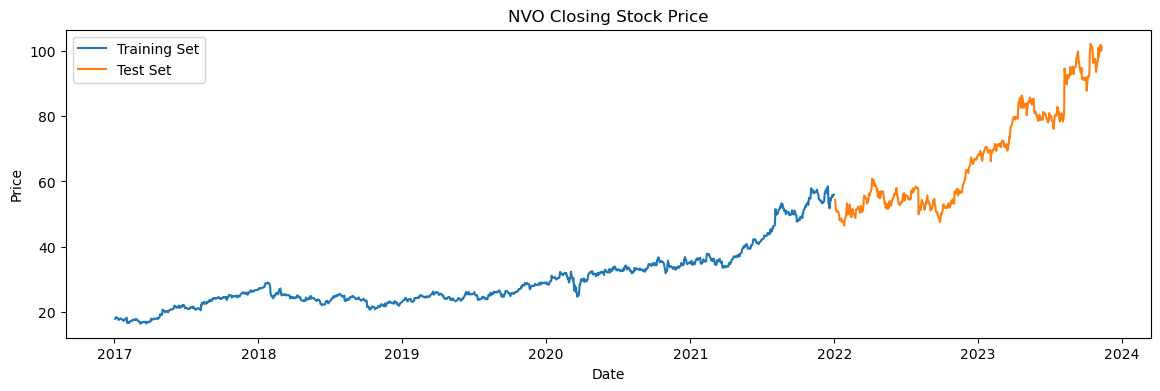

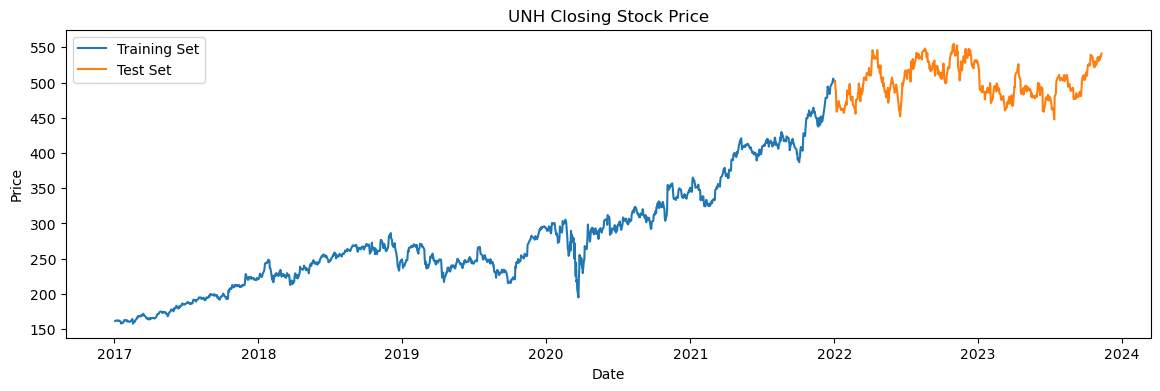

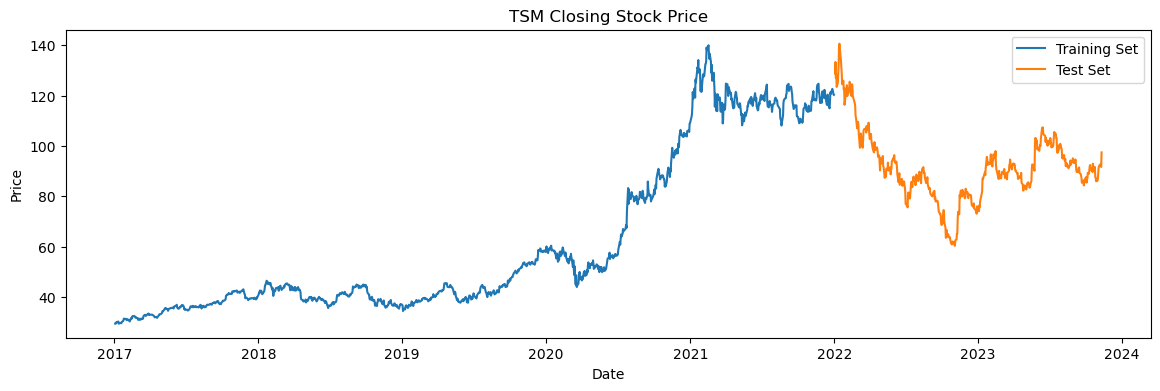

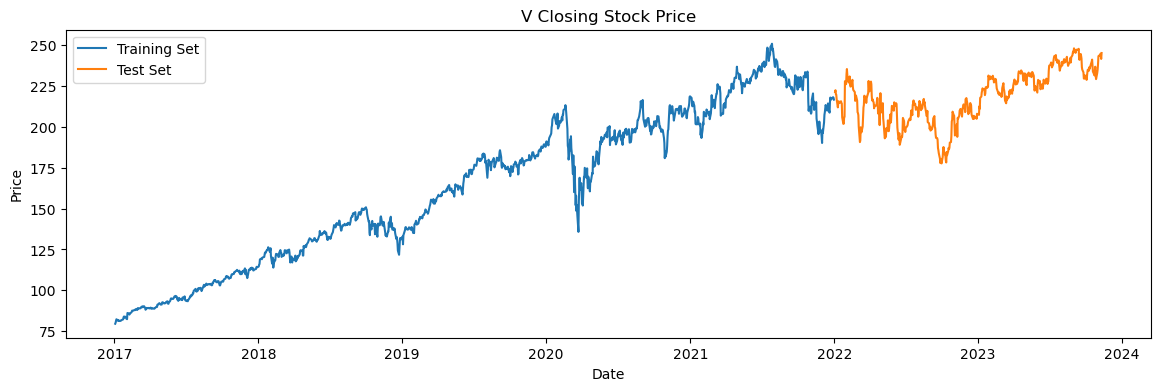

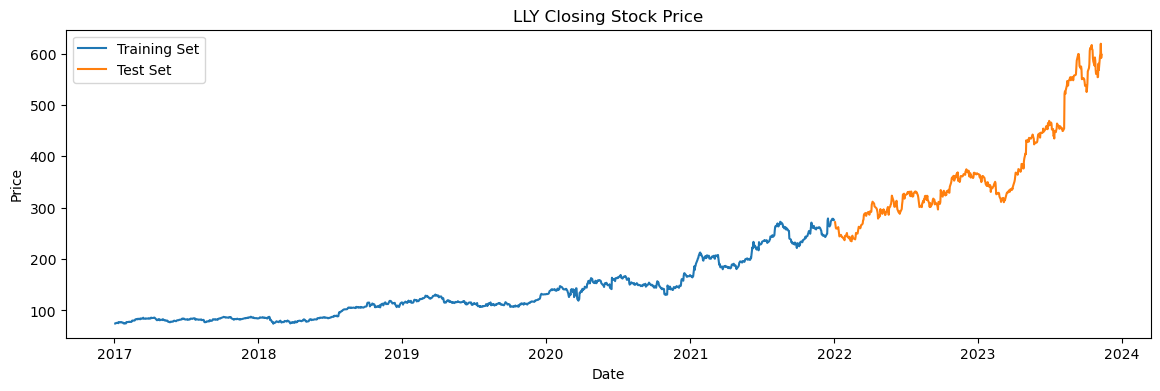

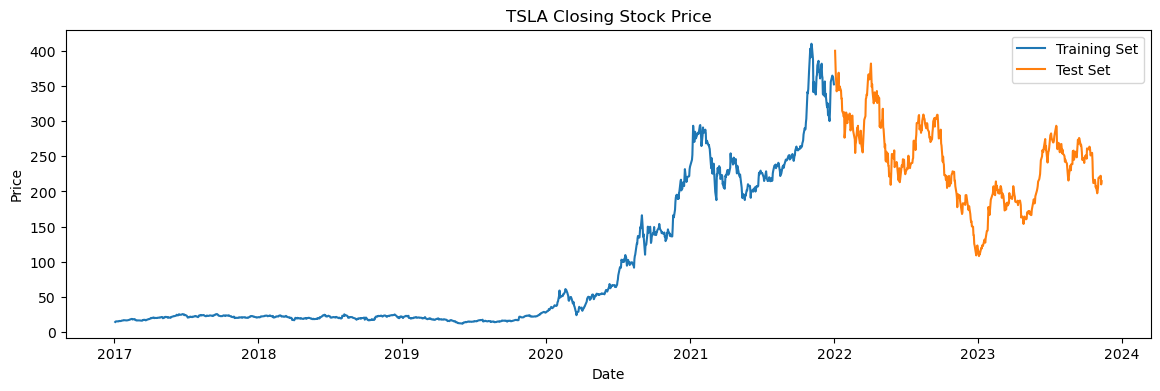

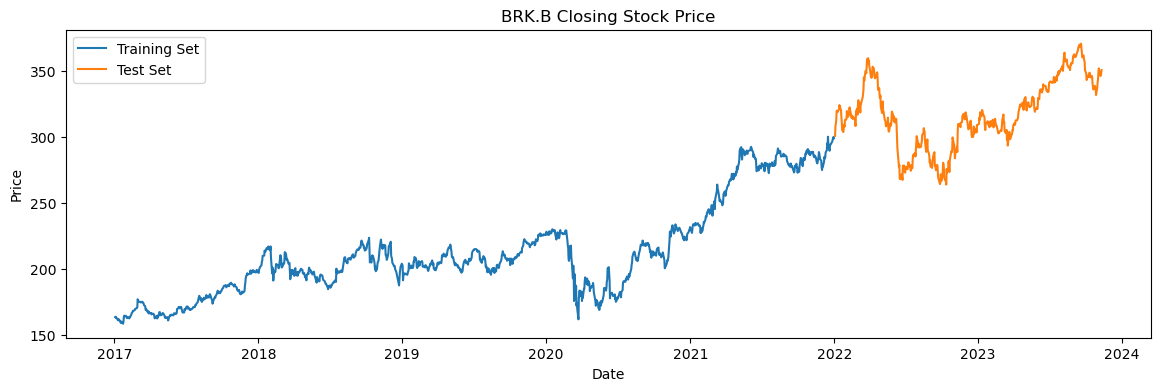

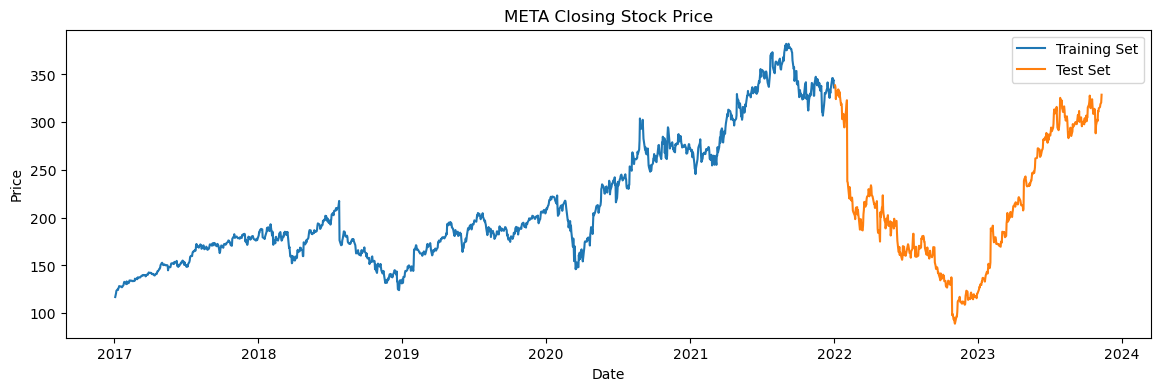

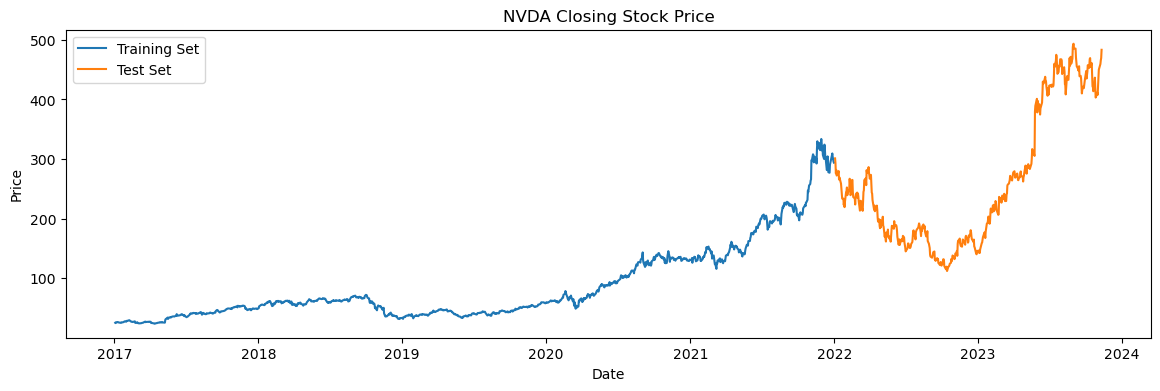

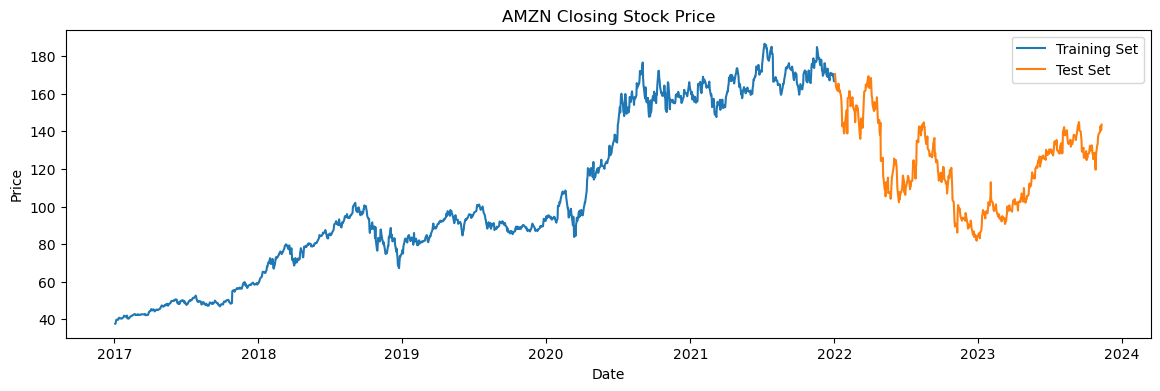

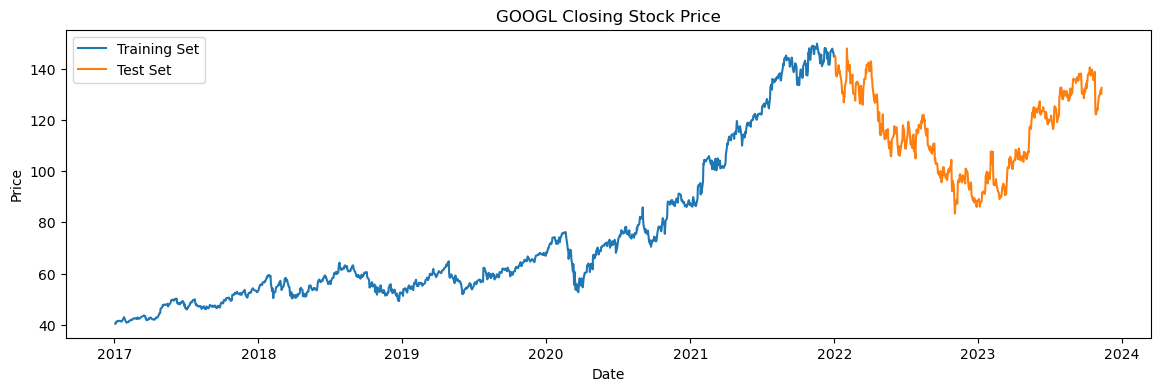

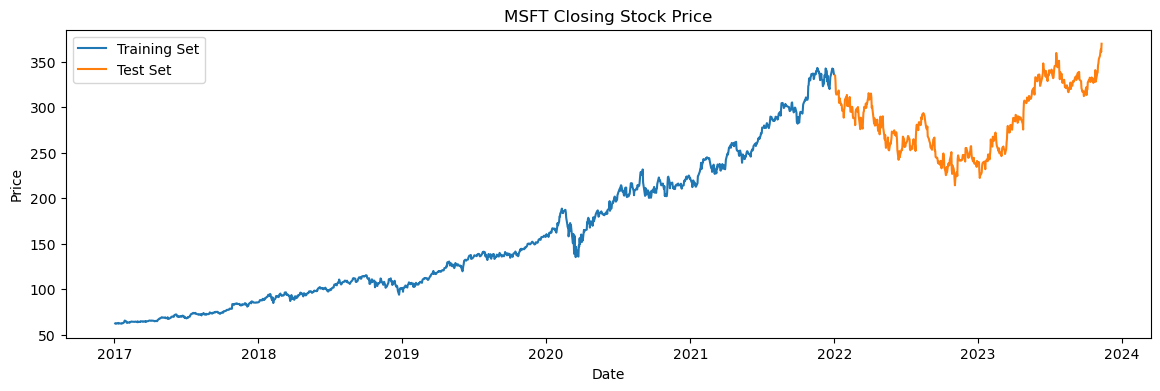

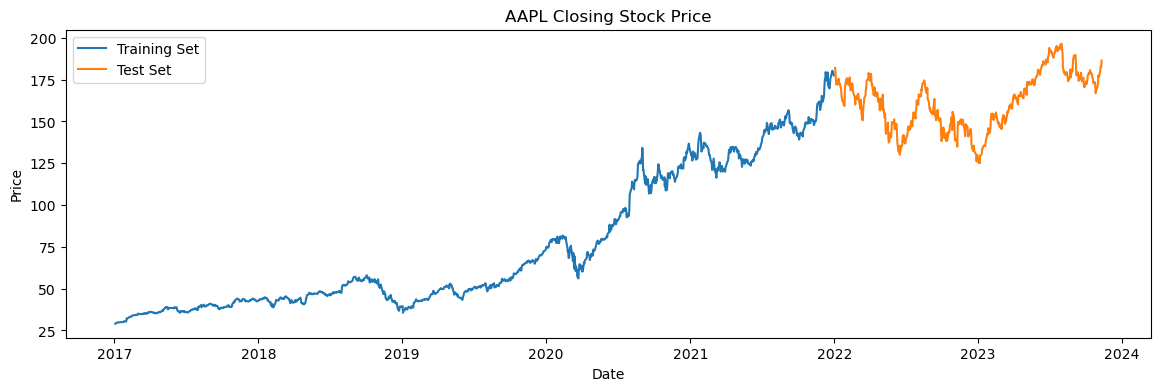

In [61]:
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"]["Close"])
    plt.plot(df_new[i]["Test"]["Close"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [62]:
# Initialize the number of features
featuresize = 6

# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])

    #if num == 49:
        #print(a0)
    a0 = a0.reshape(a0.shape[0],featuresize)
    a1 = a1.reshape(a1.shape[0],featuresize)

    #if num == 49:
        #print(a0)

    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc

    if num == 49:
       print(transform_train[i])



del a0
del a1

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.14777599e-04
  1.99925660e-04 1.82158549e-01]
 [8.21374519e-05 2.94026854e-04 1.65175833e-03 0.00000000e+00
  0.00000000e+00 1.06827542e-01]
 [1.97139912e-04 8.65742276e-04 1.75186104e-03 9.74729815e-04
  9.07298673e-04 1.17399125e-01]
 ...
 [9.88236884e-01 9.90199121e-01 9.97397228e-01 9.93722142e-01
  9.93791778e-01 5.24620337e-02]
 [9.89156904e-01 9.89807102e-01 9.97063518e-01 9.85924303e-01
  9.86080767e-01 4.61321079e-02]
 [9.80088067e-01 9.81051575e-01 9.91524264e-01 9.81761147e-01
  9.81964005e-01 5.66724824e-02]]


In [63]:
# Extract one feature which is closing price

for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

INTC (1259, 6)
PFE (1259, 6)
CMCSA (1259, 6)
SAP (1259, 6)
TMUS (1259, 6)
TMO (1259, 6)
AMD (1259, 6)
NVS (1259, 6)
LIN (1259, 6)
MCD (1259, 6)
NFLX (1259, 6)
AZN (1259, 6)
ACN (1259, 6)
CRM (1259, 6)
BABA (1259, 6)
FMX (1259, 6)
CSCO (1259, 6)
SHEL (1259, 6)
BAC (1259, 6)
PEP (1259, 6)
ABBV (1259, 6)
KO (1259, 6)
TM (1259, 6)
COST (1259, 6)
MRK (1259, 6)
ASML (1259, 6)
CVX (1259, 6)
ADBE (1259, 6)
HD (1259, 6)
ORCL (1259, 6)
JNJ (1259, 6)
PG (1259, 6)
MA (1259, 6)
AVGO (1259, 6)
XOM (1259, 6)
JPM (1259, 6)
WMT (1259, 6)
NVO (1259, 6)
UNH (1259, 6)
TSM (1259, 6)
V (1259, 6)
LLY (1259, 6)
TSLA (1259, 6)
BRK.B (1259, 6)
META (1259, 6)
NVDA (1259, 6)
AMZN (1259, 6)
GOOGL (1259, 6)
MSFT (1259, 6)
AAPL (1259, 6)


INTC (468, 6)
PFE (468, 6)
CMCSA (468, 6)
SAP (468, 6)
TMUS (468, 6)
TMO (468, 6)
AMD (468, 6)
NVS (468, 6)
LIN (468, 6)
MCD (468, 6)
NFLX (468, 6)
AZN (468, 6)
ACN (468, 6)
CRM (468, 6)
BABA (468, 6)
FMX (468, 6)
CSCO (468, 6)
SHEL (468, 6)
BAC (468, 6)
PEP (468, 6)
ABBV (468, 6)

In [64]:

trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,1259):
        X_train.append(transform_train[j][i-60:i,0:transform_train[j].shape[1]]) #What is the meaning of zero
        y_train.append(transform_train[j][i,3]) #May need to change the column number
    if j == "AAPL":
            #x = scaler[j].inverse_transform(X_train[2])  
            #print(x)
            print(y_train)
    X_train, y_train = np.array(X_train), np.array(y_train)
    '''
    if j == "AAPL":
        print(X_train)
        print(y_train)
'''
    
    trainset[j]["X"] = X_train
    #trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) #Reshape from 2D to 3D by adding a dimension with 1s
    trainset[j]["y"] = y_train
    '''''
    if j == "AAPL":
        print(trainset[j]["X"])
        print(trainset[j]["y"])
        buff["X_train"] = trainset[j]["X"].shape
        print(buff["X_train"])
        '''

    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 468):
        X_test.append(transform_test[j][i-60:i,:transform_test[j].shape[1]])
        y_test.append(transform_test[j][i,3]) #May need to change the column number
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = X_test
    #testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test


[0.04610935988801193, 0.04566331824104722, 0.04572939008216312, 0.047497120637816526, 0.046258065645638335, 0.04566331824104722, 0.045134642677572, 0.04485379323771441, 0.04230961141224271, 0.04259046085210036, 0.04135140585992214, 0.04264002103509626, 0.04159920677490245, 0.04074012158857307, 0.04364778677041345, 0.043366937330555855, 0.045630269716170624, 0.04710061396520979, 0.04569634155728586, 0.04587807063115096, 0.04564678137428996, 0.05048736931889153, 0.05202378540904598, 0.05128035745546641, 0.05040476061101831, 0.054419311894167766, 0.06111018868501944, 0.06272923869168506, 0.061523207015745485, 0.06266314164193182, 0.06621511441135863, 0.0655542699570143, 0.06517430015116488, 0.05655047538891339, 0.06033371220656325, 0.06119279739289202, 0.06272923869168506, 0.06241534072695154, 0.061655375906614684, 0.06253097275106267, 0.062101442762217296, 0.06220056312820915, 0.060697170354293395, 0.061391038124876396, 0.0651412516262882, 0.06263009311705459, 0.06348917830338396, 0.0650

In [65]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

X_train  y_train        X_test  y_test
INTC   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
PFE    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
CMCSA  (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
SAP    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
TMUS   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
TMO    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
AMD    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
NVS    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
LIN    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
MCD    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
NFLX   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
AZN    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
ACN    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
CRM    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
BABA   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
FMX    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
CSCO   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
SHEL   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
BAC    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
PEP    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
ABBV   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
KO     (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
TM     (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
COST   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
MRK    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
ASML   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
CVX    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
ADBE   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
HD     (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
ORCL   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
JNJ    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
PG     (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
MA     (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
AVGO   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
XOM    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
JPM    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
WMT    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
NVO    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
UNH    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
TSM    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
V      (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
LLY    (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
TSLA   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
BRK.B  (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
META   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
NVDA   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
AMZN   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
GOOGL  (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
MSFT   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)
AAPL   (1199, 60, 6)  (1199,)  (408, 60, 6)  (408,)

In [66]:

%%time

# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],6)))  # search what is the input_shape?
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))    # How number of layers will matter the training result?
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
loss_history = []
val_history=[]
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    model = regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=20, batch_size=200, validation_split=0.1) 
    loss_history.append(model.history['loss'])
    val_history.append(model.history['val_loss'])

Fitting to INTC
Epoch 1/20
6/6 [==============================] - 15s 817ms/step - loss: 0.1450 - val_loss: 0.0501
Epoch 2/20
6/6 [==============================] - 2s 383ms/step - loss: 0.0400 - val_loss: 0.0147
Epoch 3/20
6/6 [==============================] - 2s 375ms/step - loss: 0.0320 - val_loss: 0.0081
Epoch 4/20
6/6 [==============================] - 3s 467ms/step - loss: 0.0246 - val_loss: 0.0021
Epoch 5/20
6/6 [==============================] - 3s 444ms/step - loss: 0.0226 - val_loss: 0.0021
Epoch 6/20
6/6 [==============================] - 2s 386ms/step - loss: 0.0194 - val_loss: 0.0044
Epoch 7/20
6/6 [==============================] - 2s 396ms/step - loss: 0.0187 - val_loss: 0.0017
Epoch 8/20
6/6 [==============================] - 2s 369ms/step - loss: 0.0181 - val_loss: 0.0035
Epoch 9/20
6/6 [==============================] - 3s 451ms/step - loss: 0.0174 - val_loss: 0.0041
Epoch 10/20
6/6 [==============================] - 3s 428ms/step - loss: 0.0157 - val_loss: 0.0021
Ep

In [ ]:
loss_arr = np.array(loss_history)
# Reshape the array into a single row
reshaped_loss_list = [item for sublist in loss_history for item in sublist]
print(reshaped_loss_list)

val_loss_arr = np.array(val_history)
# Reshape the array into a single row
reshaped_val_loss_list = [item for sublist in val_history for item in sublist]

[0.11013469845056534, 0.03551904484629631, 0.02737179584801197, 0.02287135273218155, 0.023192837834358215, 0.019274605438113213, 0.02045227400958538, 0.018074406310915947, 0.01653636246919632, 0.017274709418416023, 0.014529833570122719, 0.016054149717092514, 0.01574392057955265, 0.015472335740923882, 0.015669306740164757, 0.01470448262989521, 0.014413954690098763, 0.014591597951948643, 0.014373604208230972, 0.013553819619119167, 0.0038892945740371943, 0.003671209095045924, 0.0036892599891871214, 0.003278337186202407, 0.003144311485812068, 0.0034143344964832067, 0.00301722576841712, 0.003187946043908596, 0.0031825730111449957, 0.0032548264134675264, 0.002981855534017086, 0.0031372783705592155, 0.003035743022337556, 0.003008822677657008, 0.0030992517713457346, 0.0028787588234990835, 0.0029860823415219784, 0.0028103594668209553, 0.0028635039925575256, 0.0028893027920275927, 0.0062249451875686646, 0.006430901121348143, 0.006237869616597891, 0.005864275619387627, 0.005916062742471695, 0.006

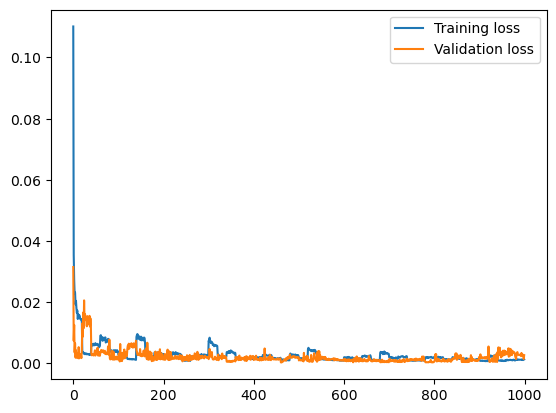

In [ ]:
plt.plot(reshaped_loss_list, label='Training loss')
plt.plot(reshaped_val_loss_list, label='Validation loss')
plt.legend()

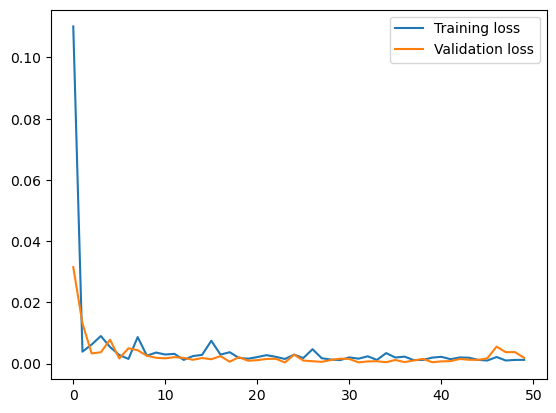

In [ ]:
plt.plot([item[0] for item in loss_history], label='Training loss') #First epoch for each stock
plt.plot([item[0] for item in val_history], label='Validation loss') #First epoch for each stock
plt.legend()

13/13 [==============================] - 2s 17ms/step
(408,)
(408,)
13/13 [==============================] - 0s 18ms/step
(408,)
(408,)
13/13 [==============================] - 0s 18ms/step
(408,)
(408,)
13/13 [==============================] - 0s 18ms/step
(408,)
(408,)
13/13 [==============================] - 0s 18ms/step
(408,)
(408,)
13/13 [==============================] - 0s 20ms/step
(408,)
(408,)
13/13 [==============================] - 0s 26ms/step
(408,)
(408,)
13/13 [==============================] - 0s 19ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 18ms/step
(408,)
(408,)
13/13 [==============================] - 0s 20ms

/var/folders/tt/rynv9sfx6hd7zsm3w8y6qv8c0000gn/T/ipykernel_46887/315142798.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


13/13 [==============================] - 0s 17ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 17ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 22ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 17ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms/step
(408,)
(408,)
13/13 [==============================] - 0s 16ms

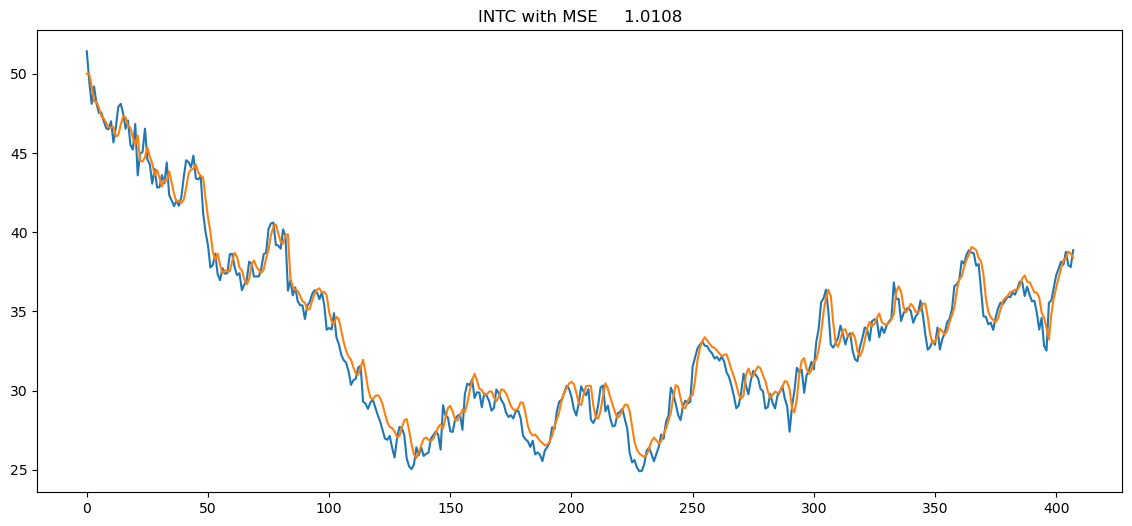

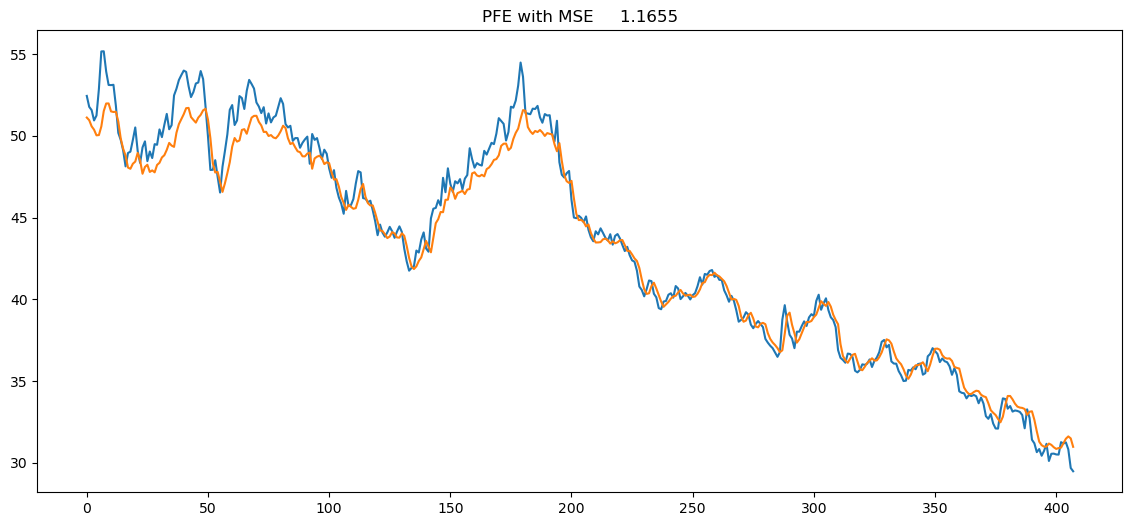

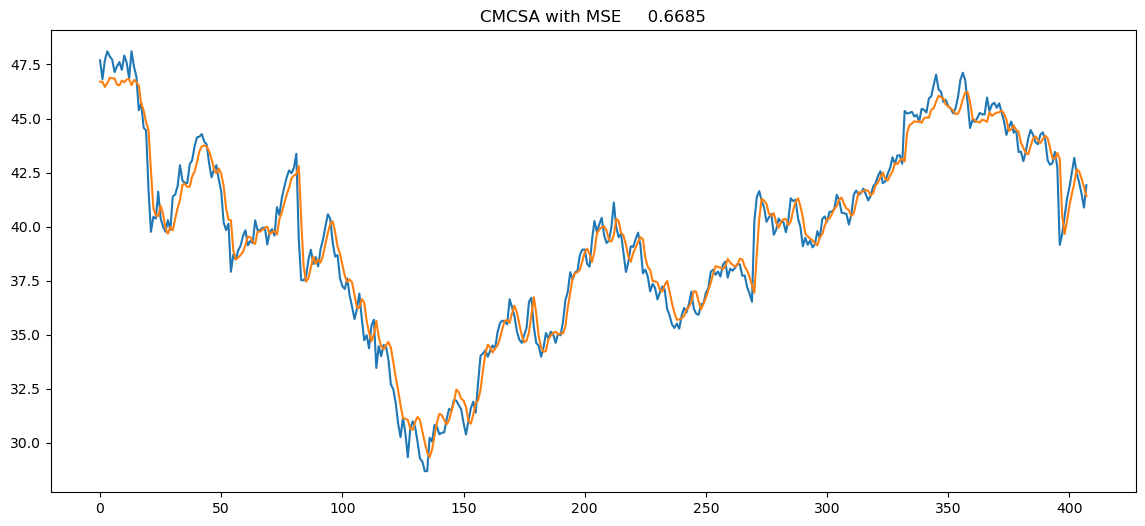

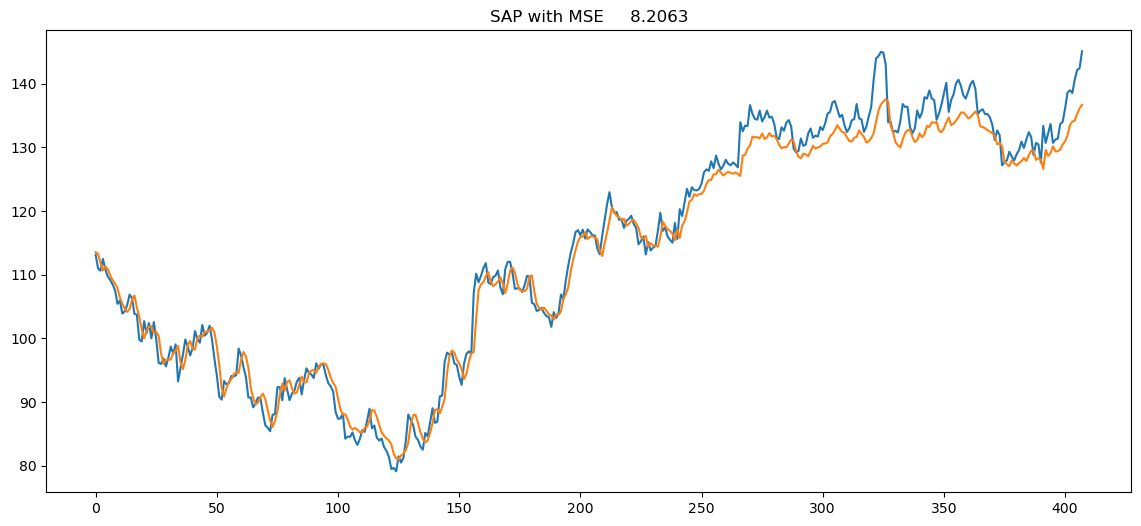

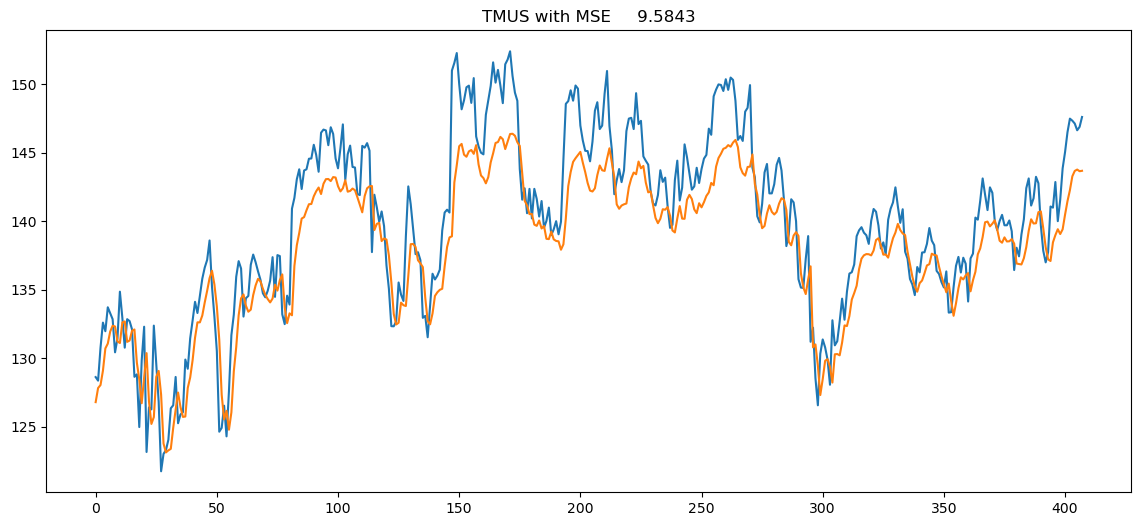

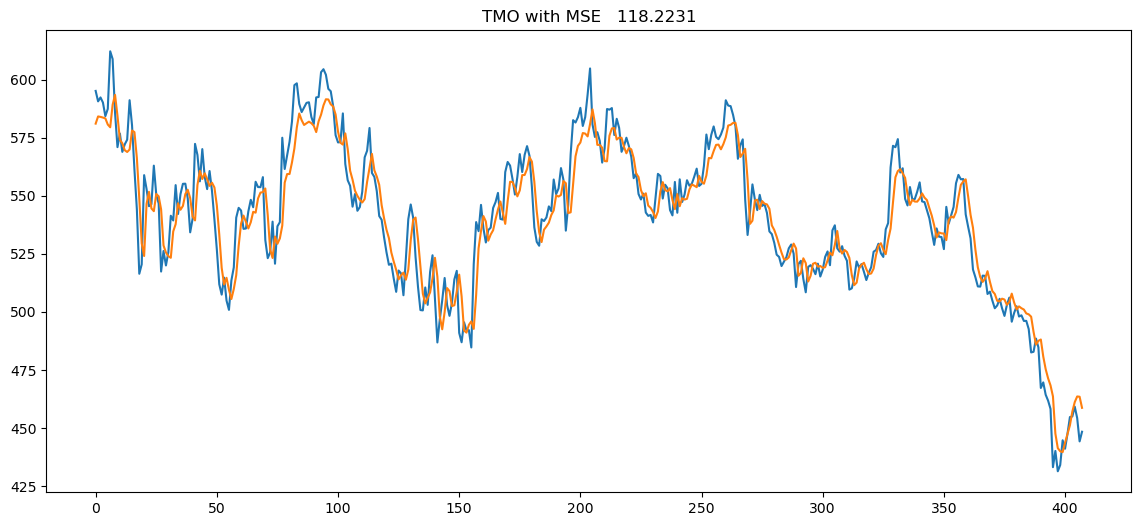

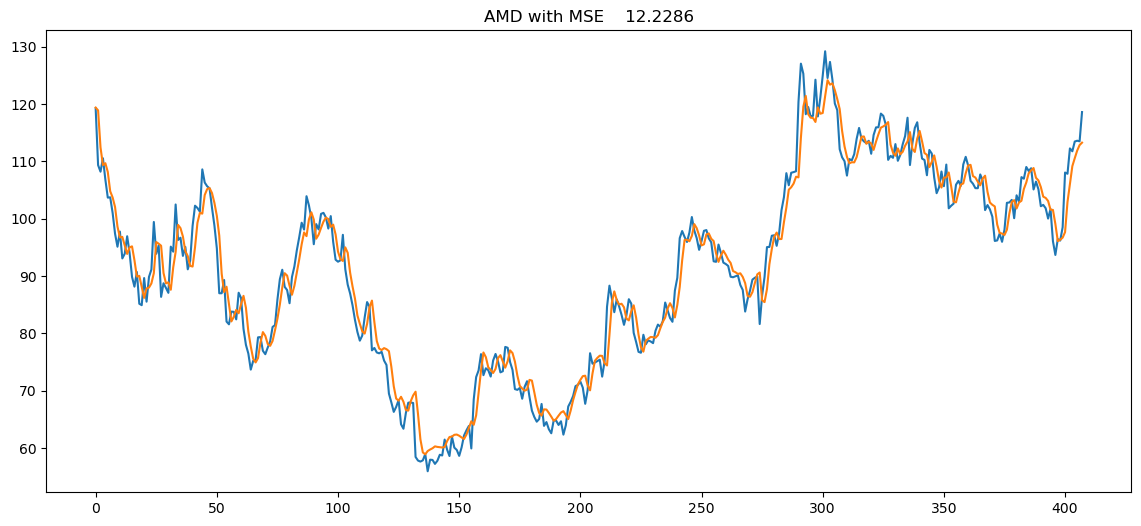

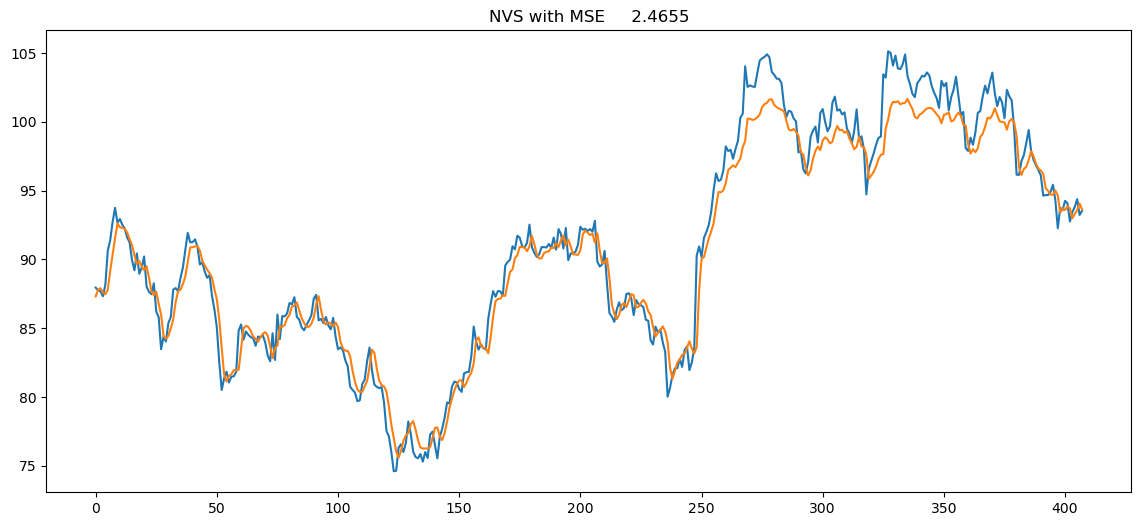

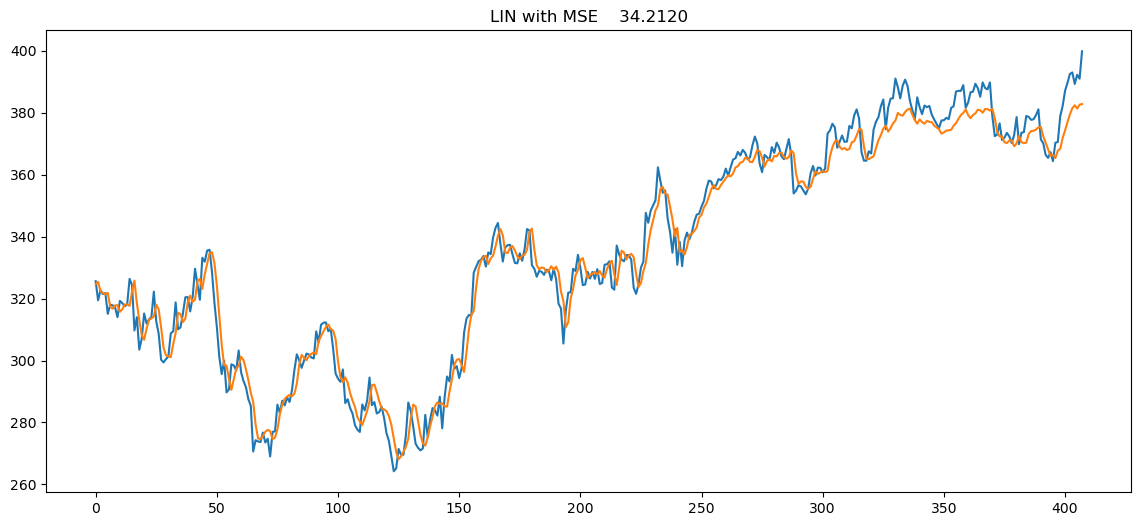

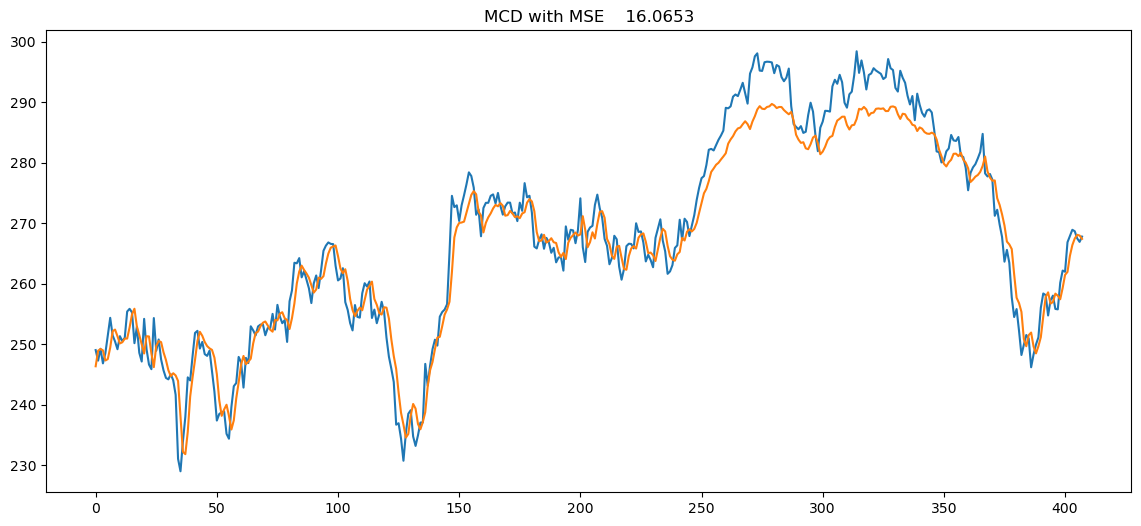

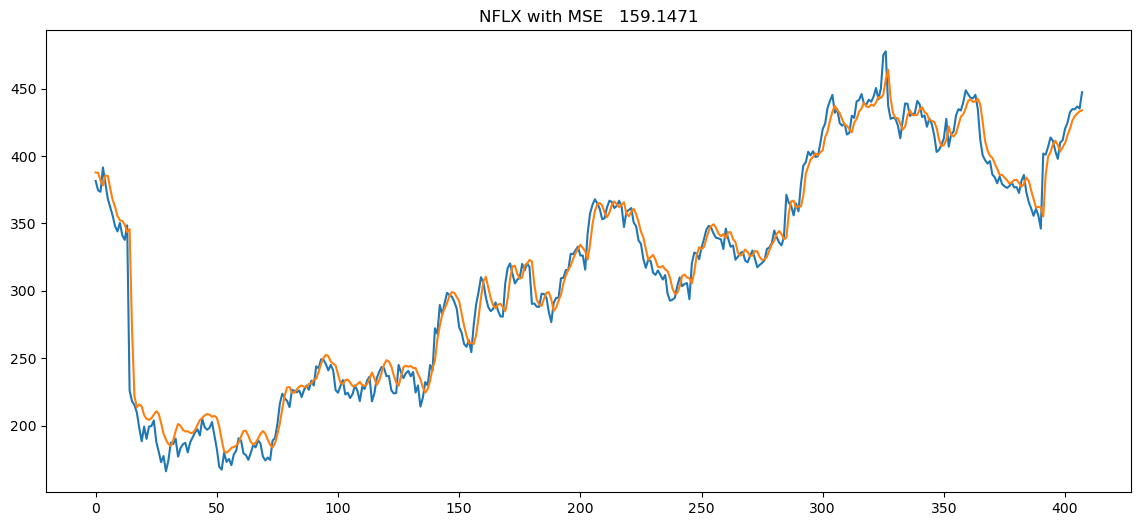

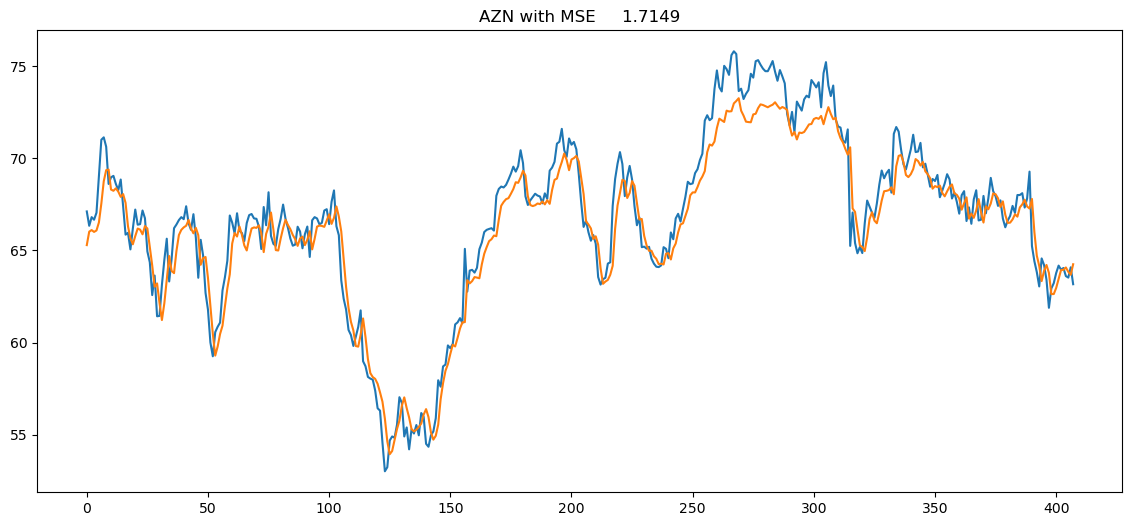

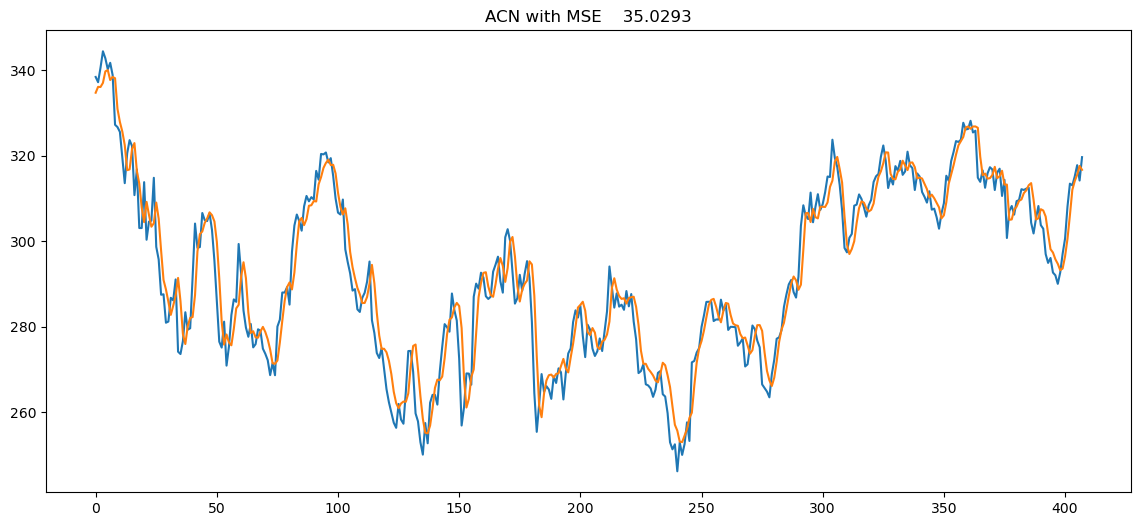

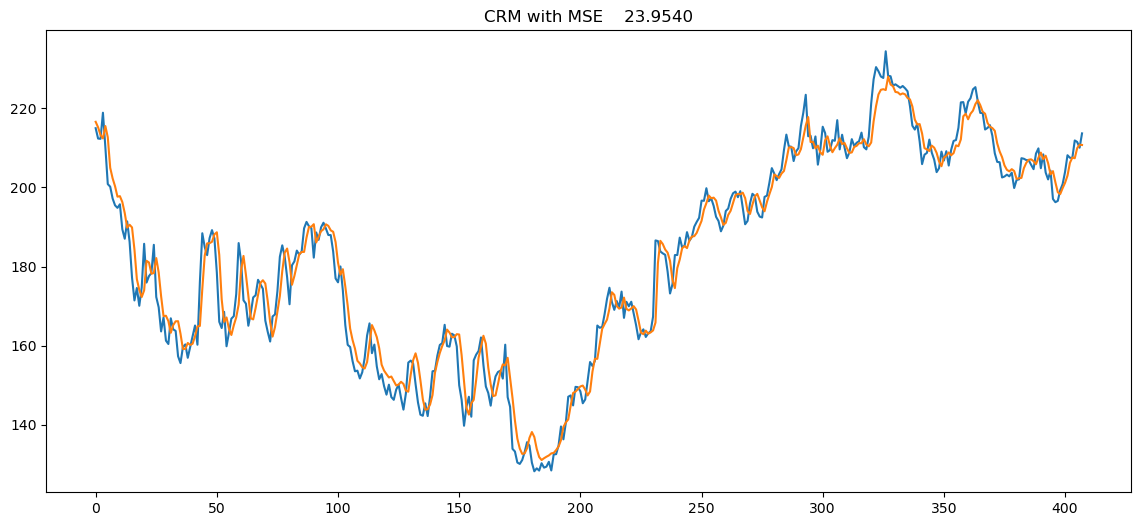

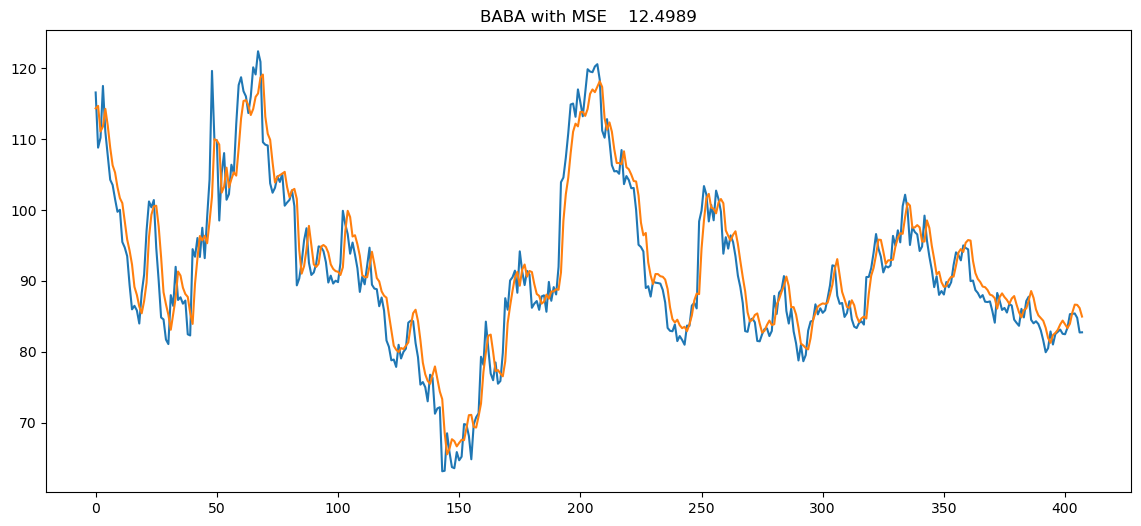

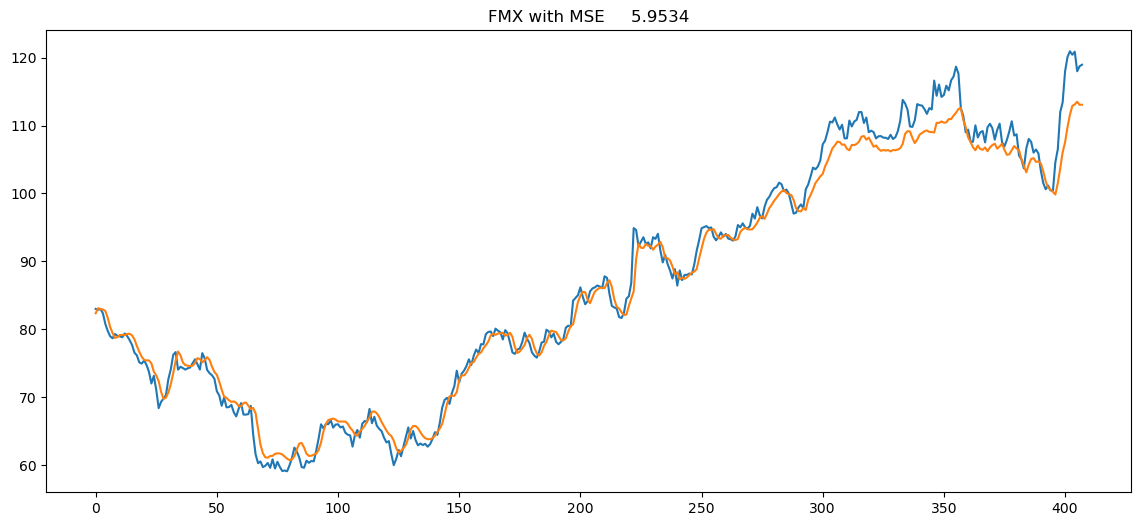

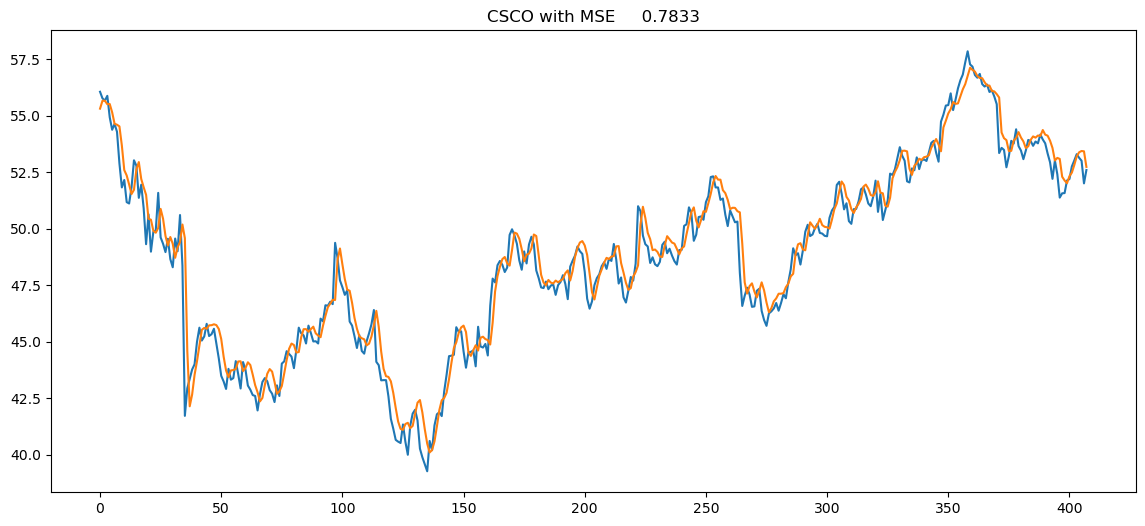

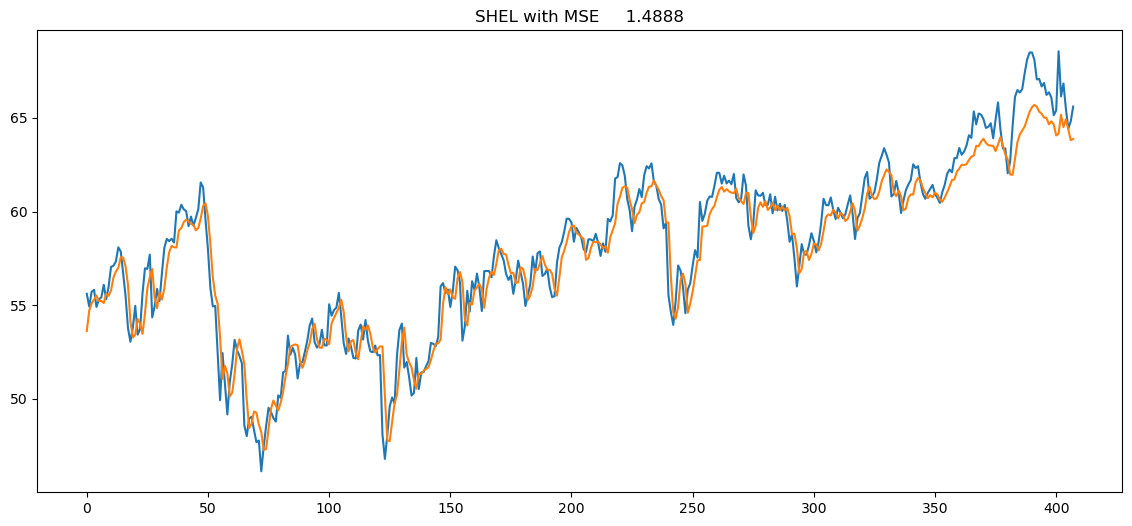

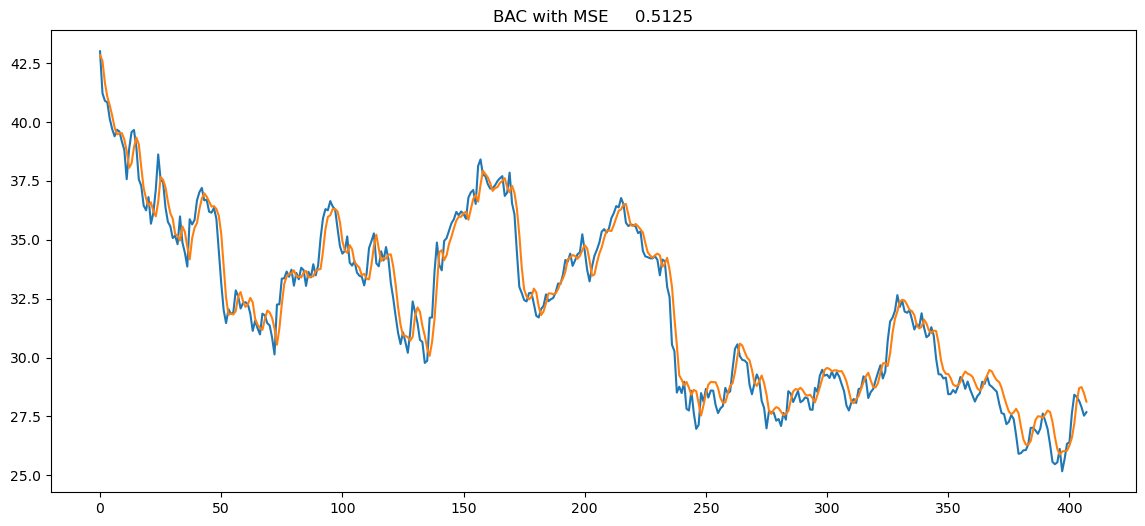

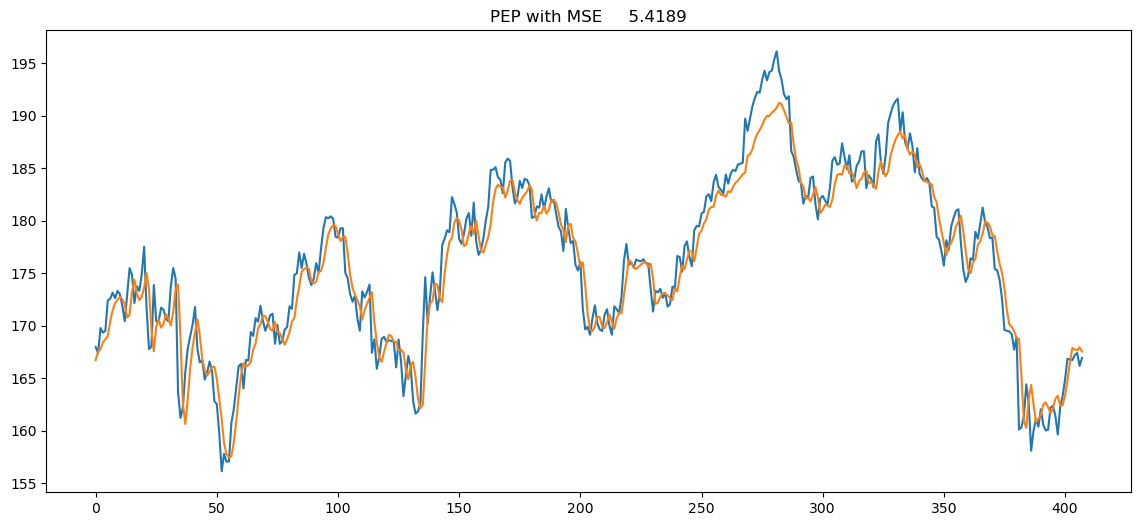

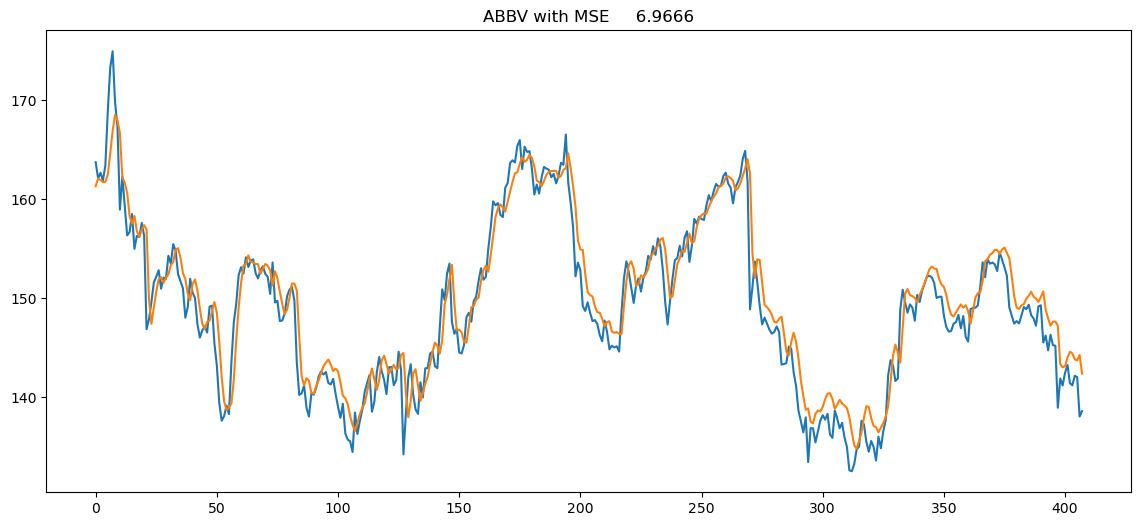

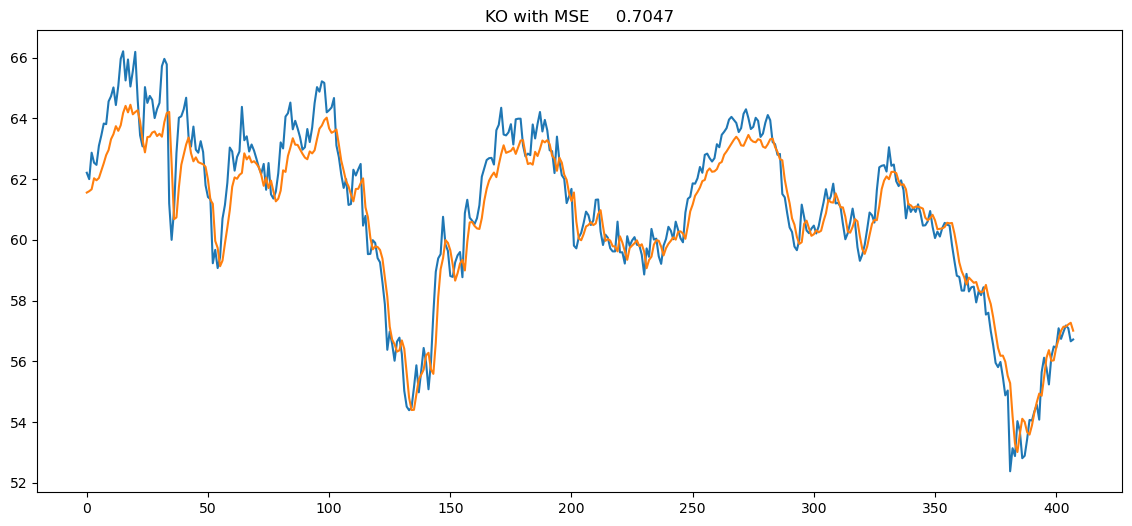

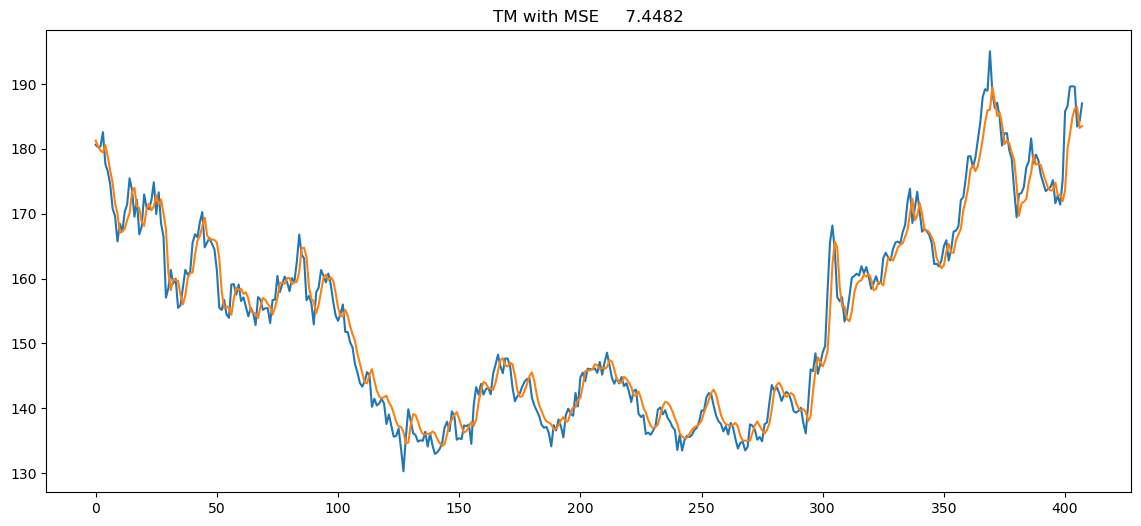

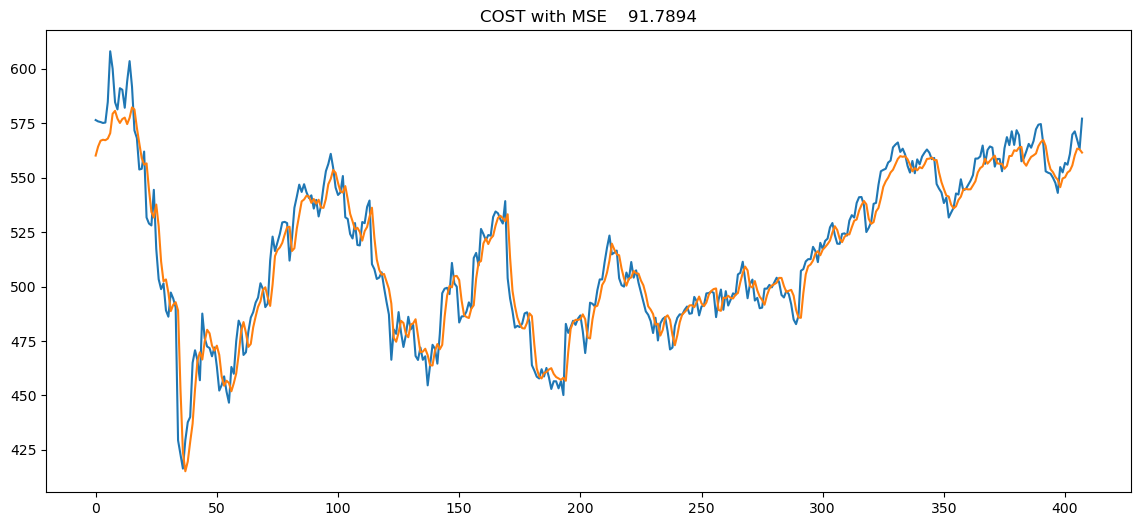

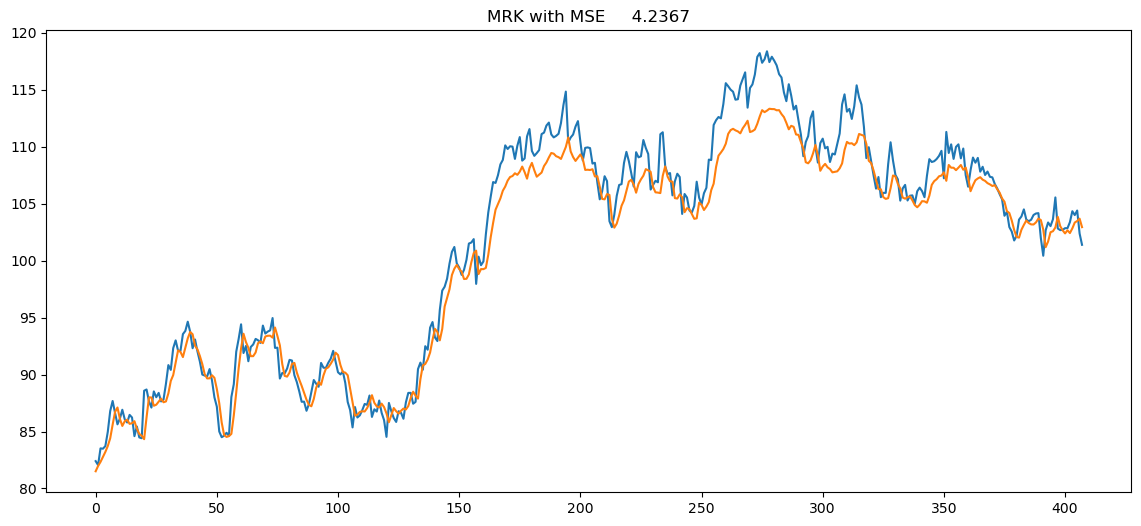

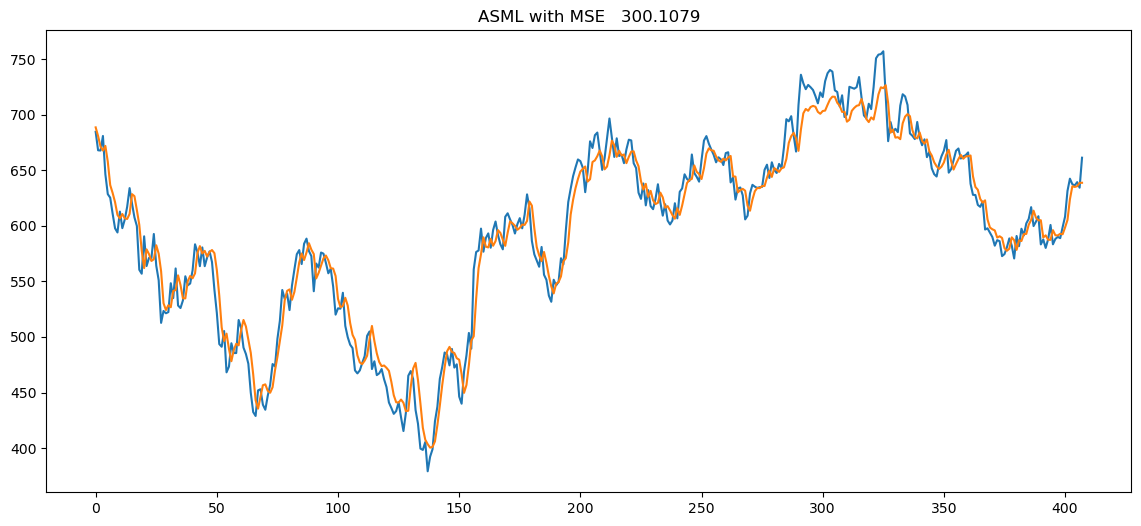

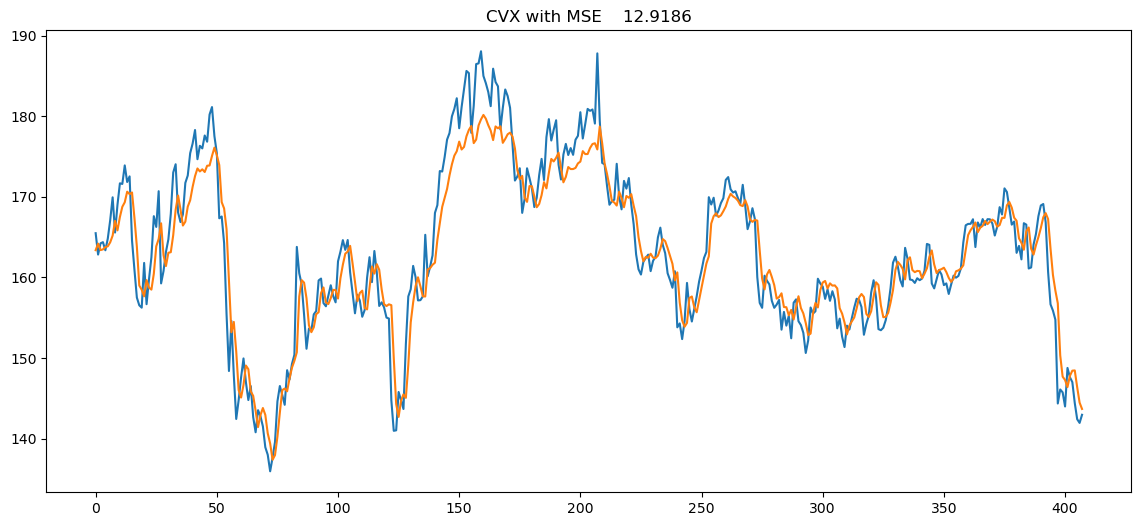

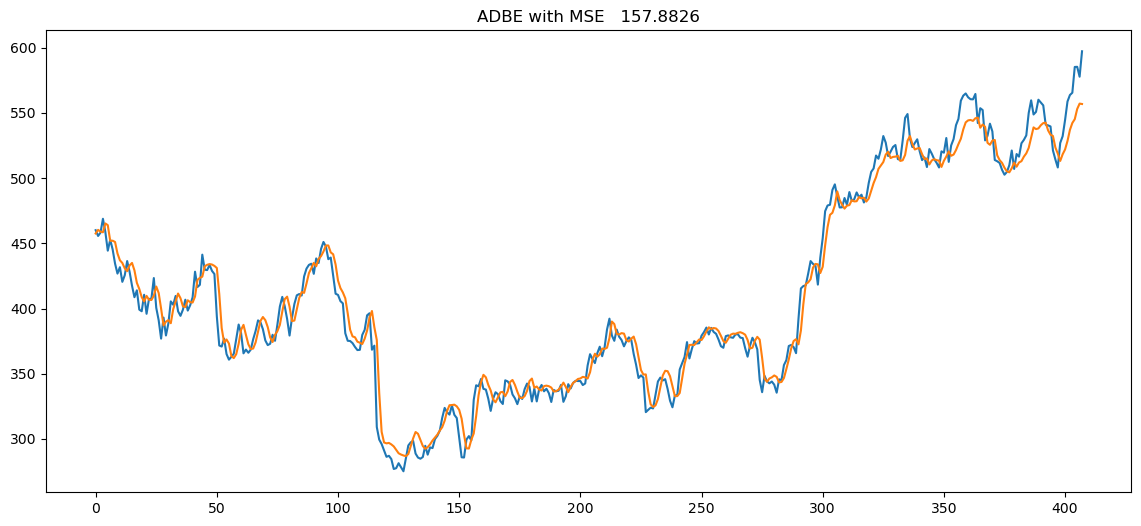

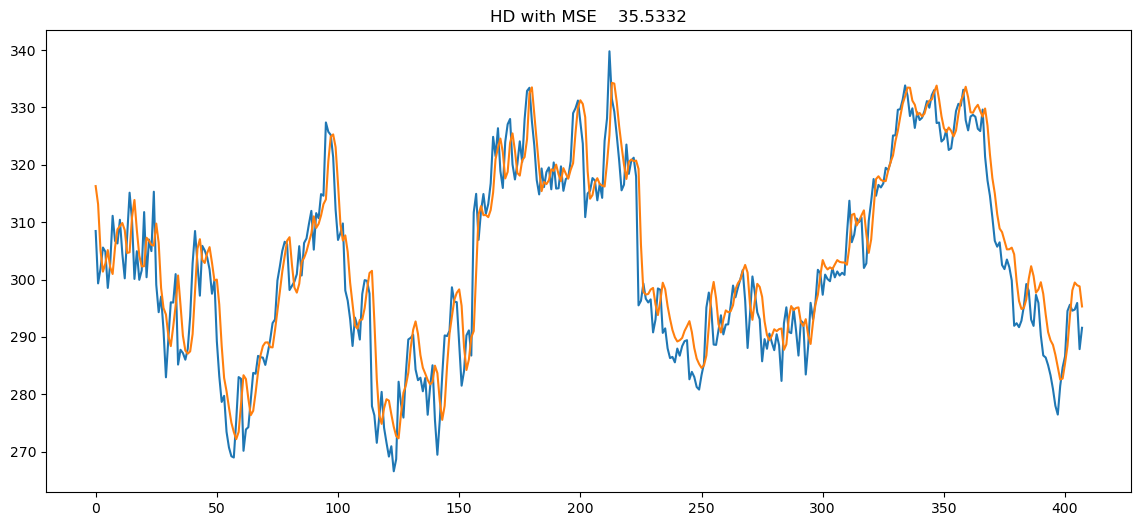

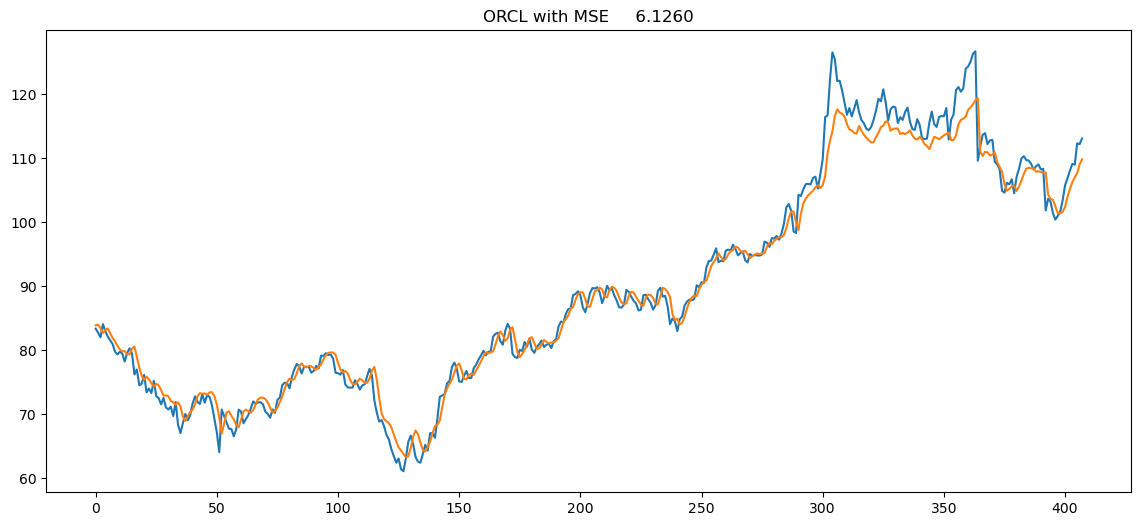

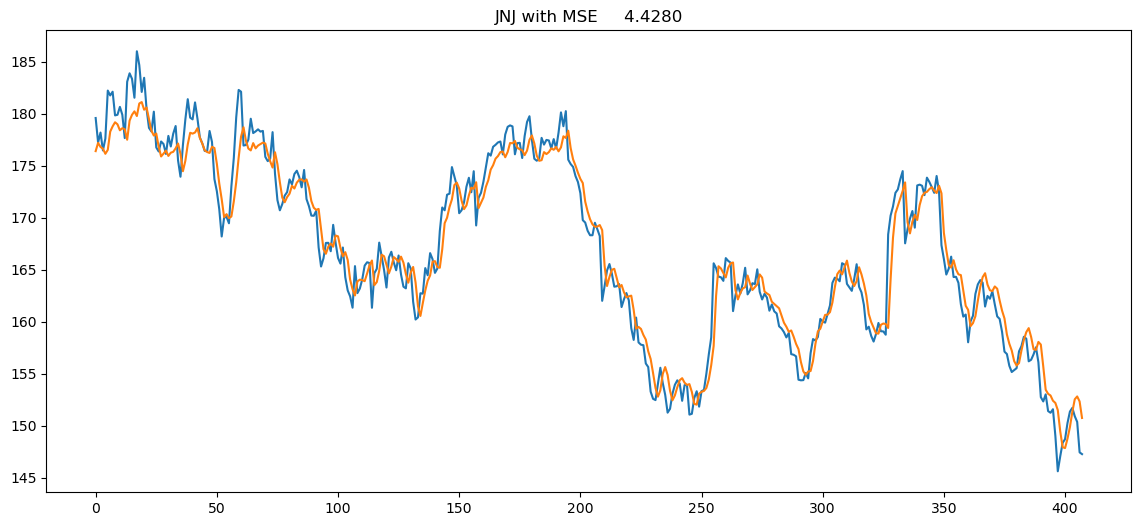

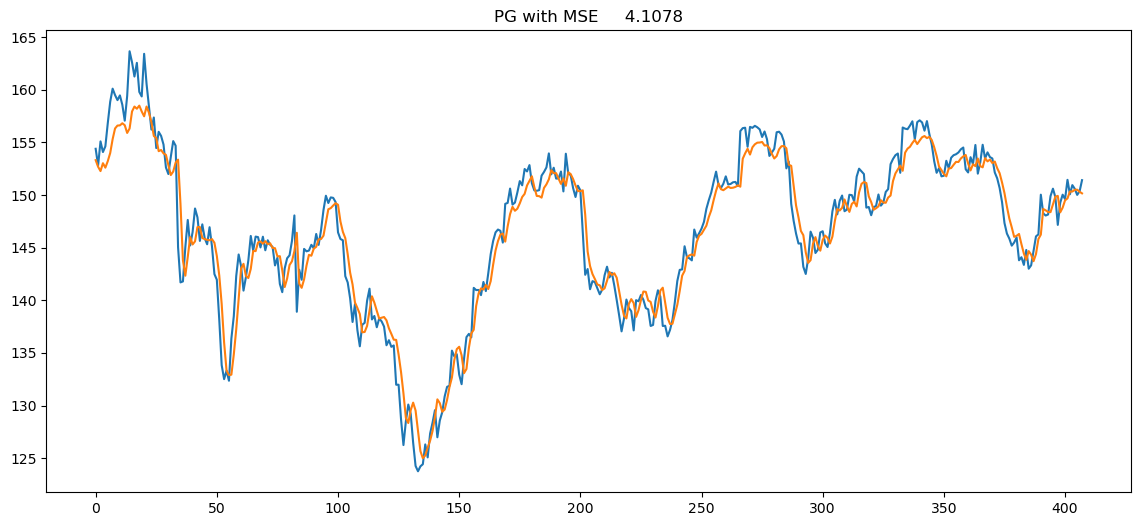

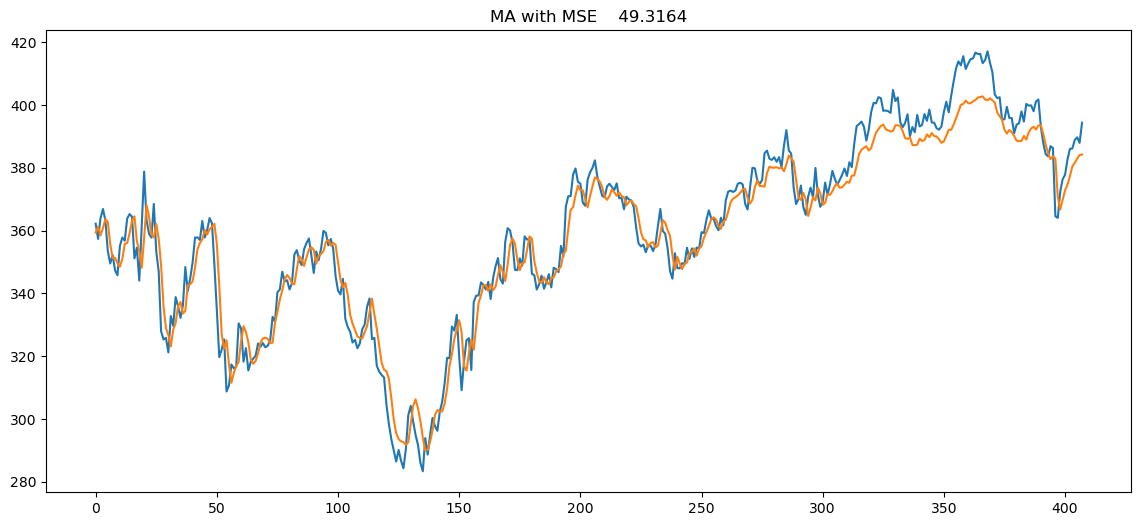

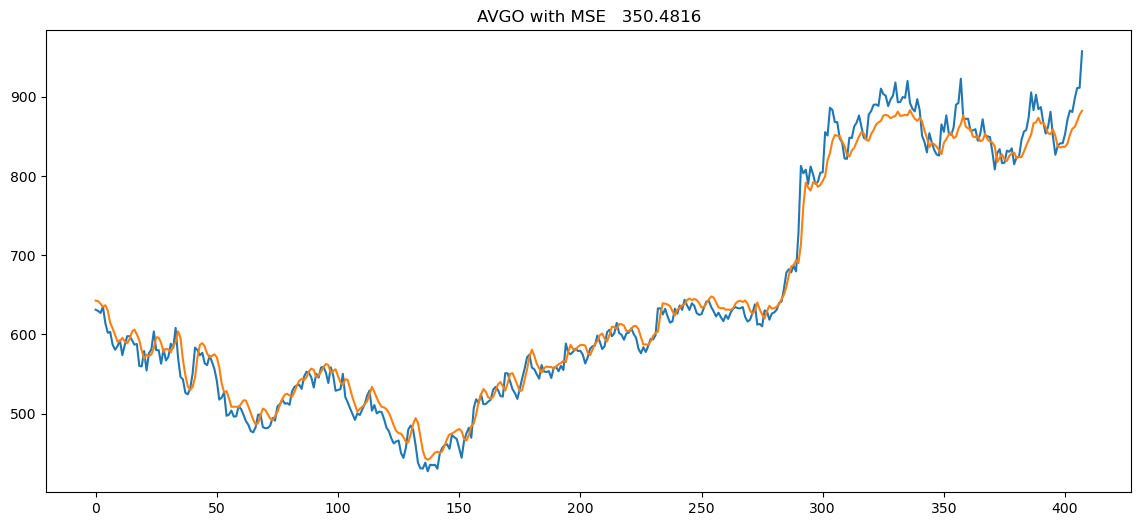

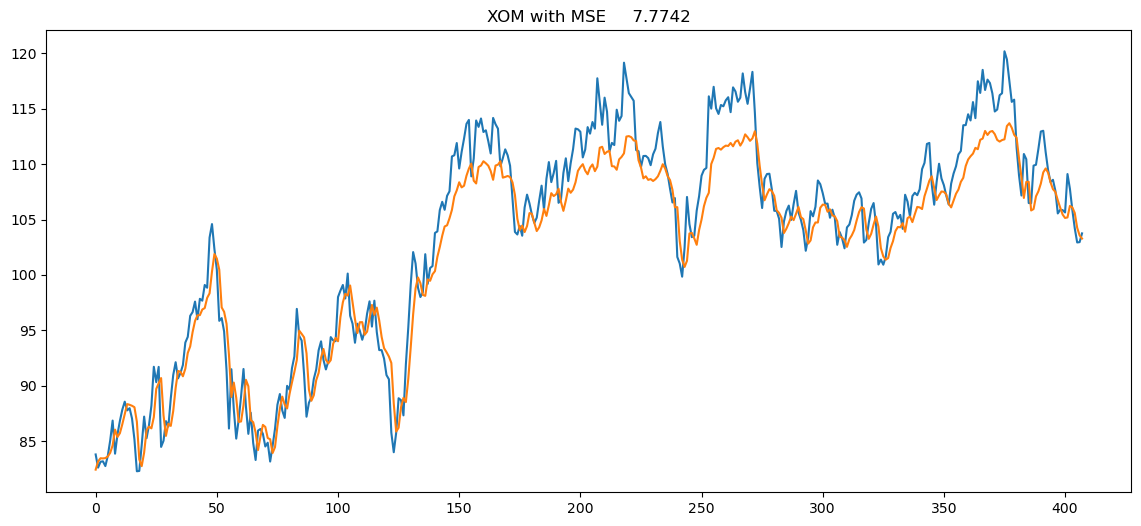

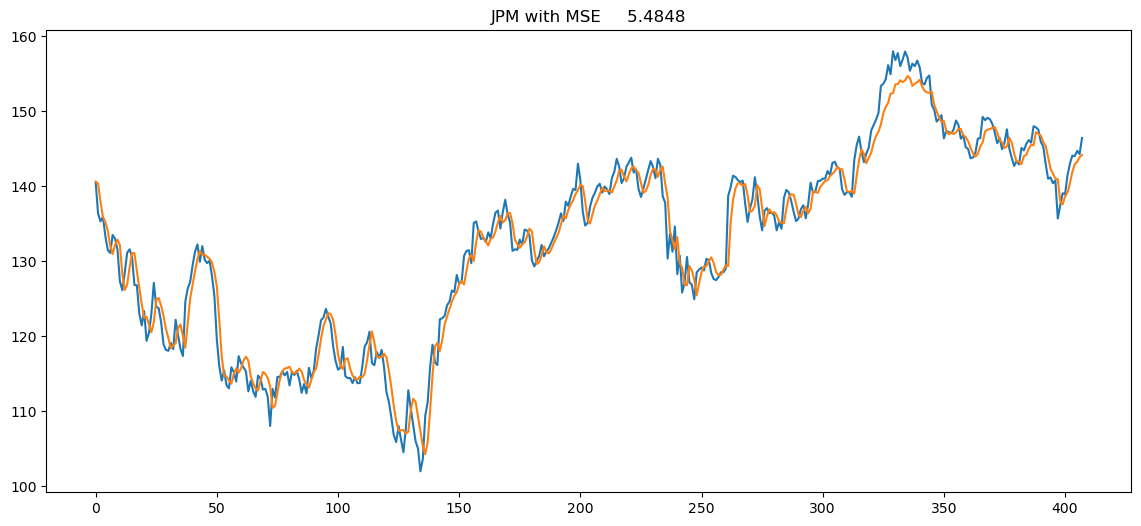

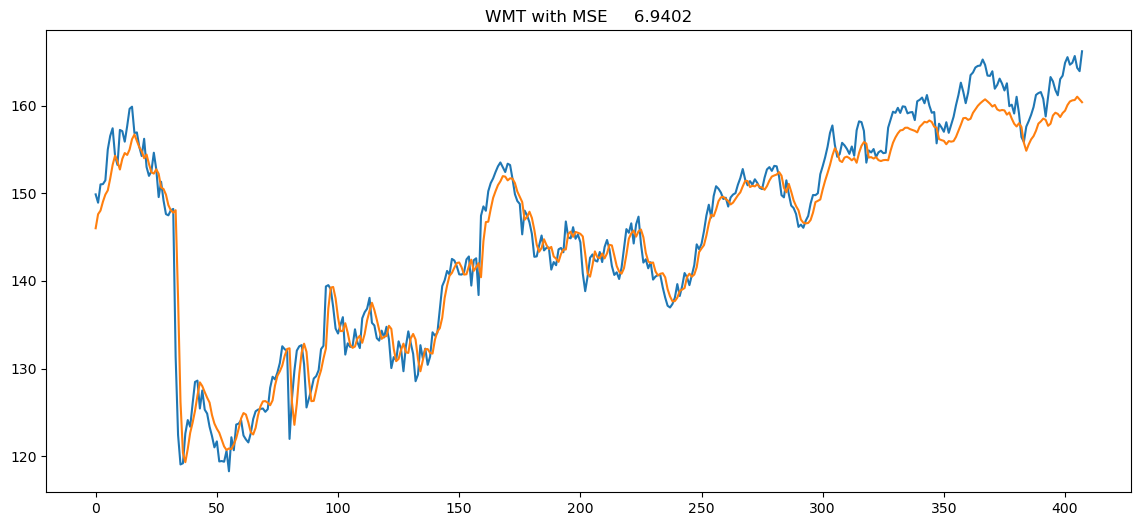

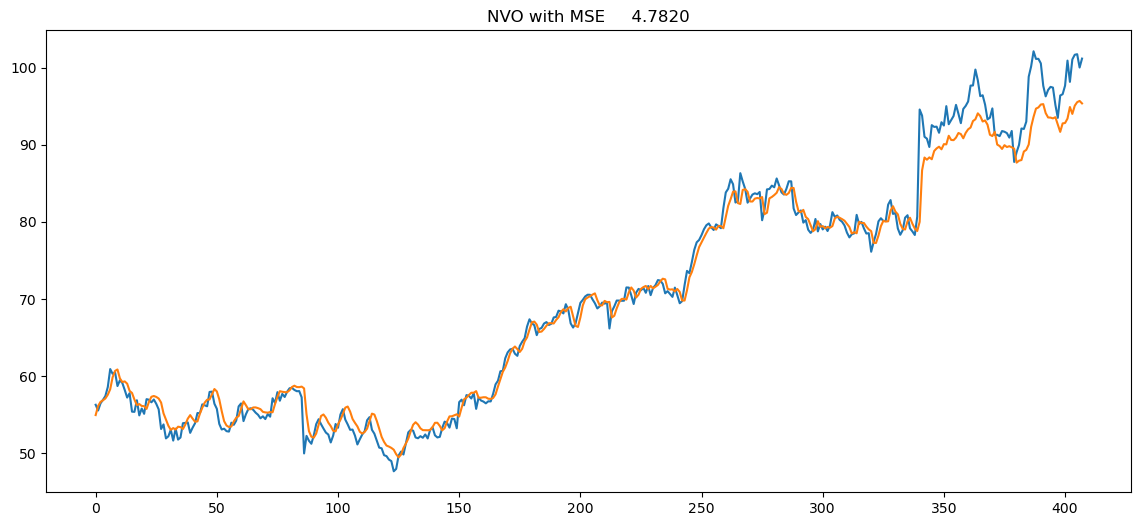

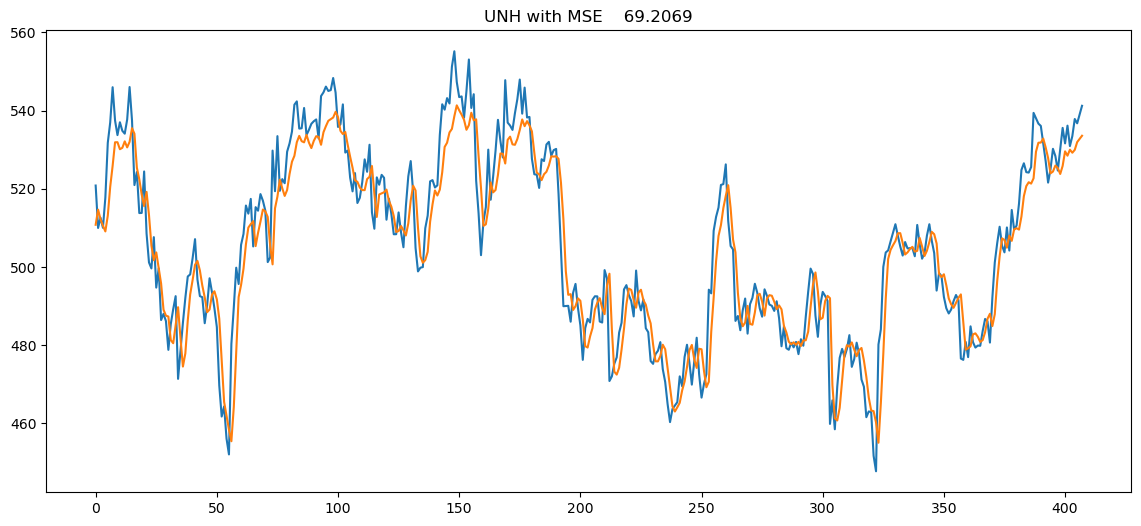

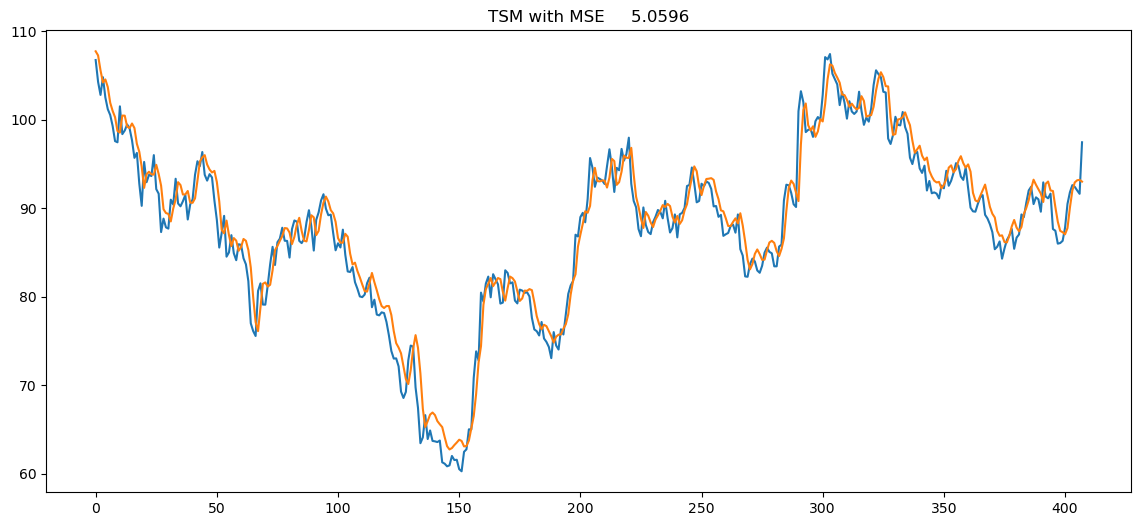

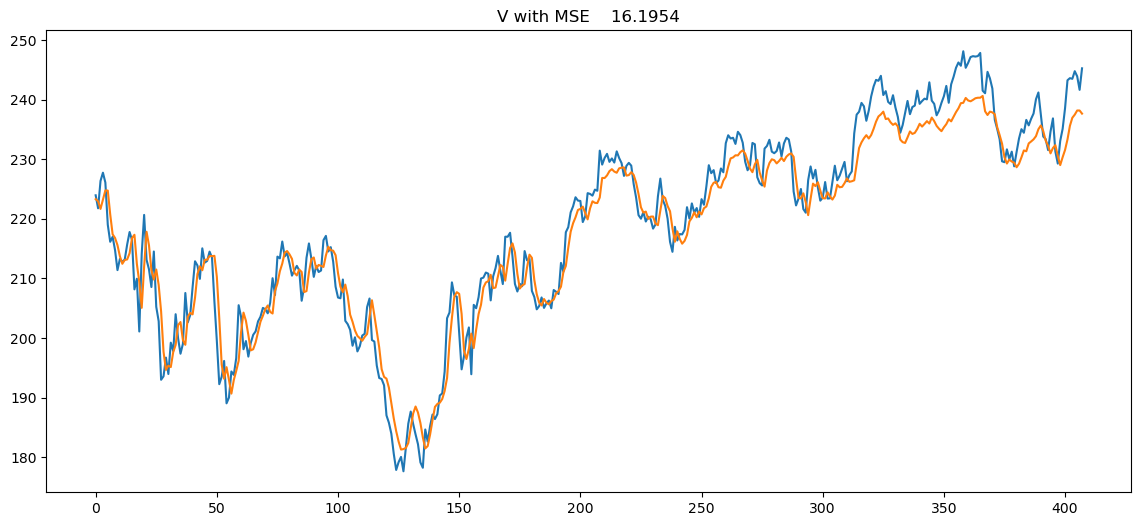

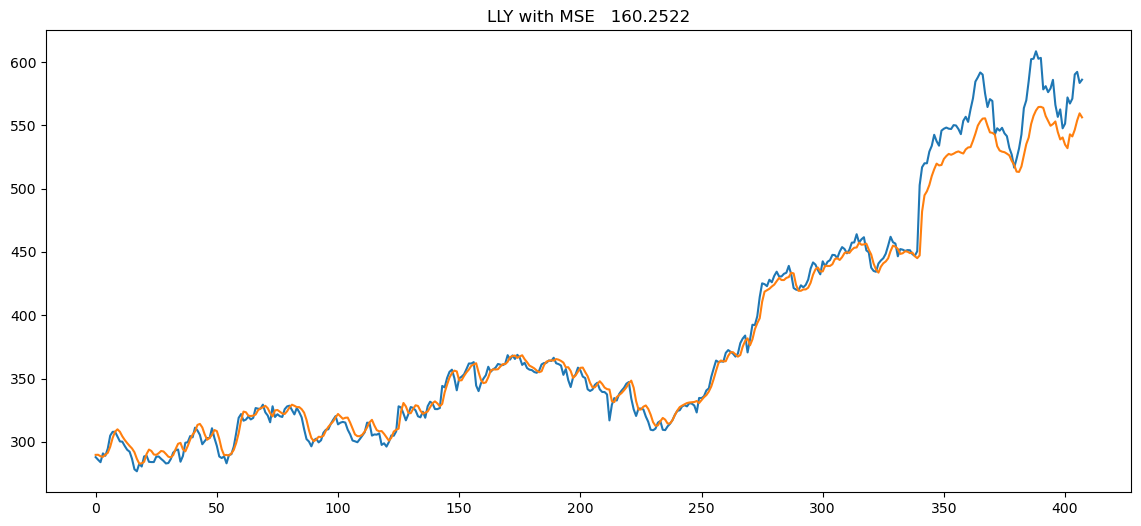

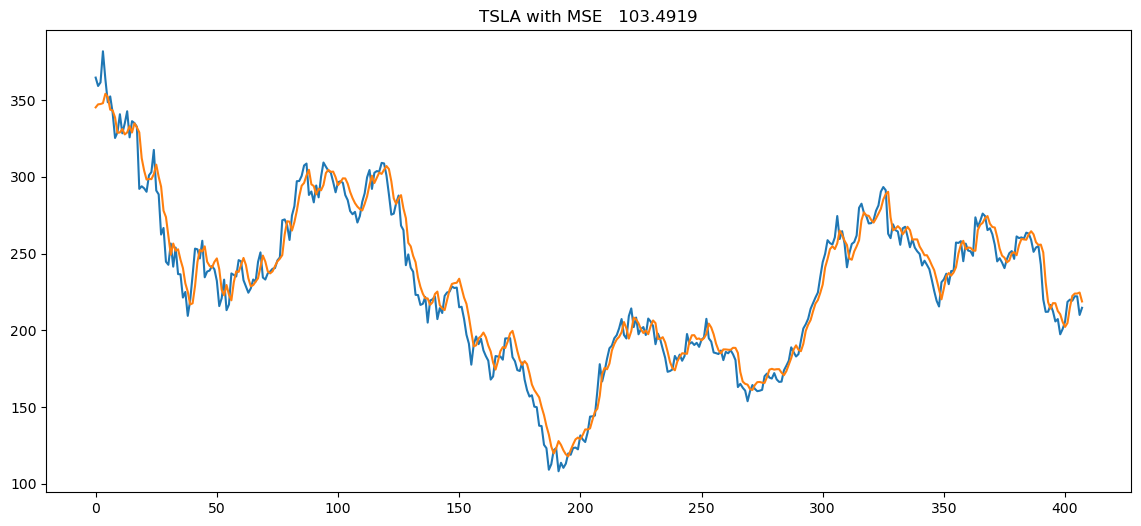

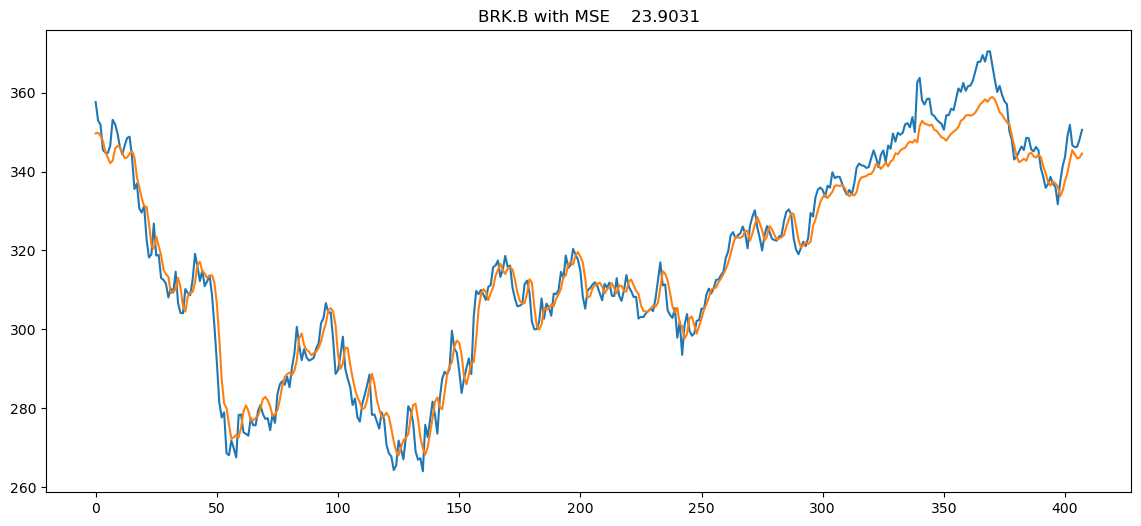

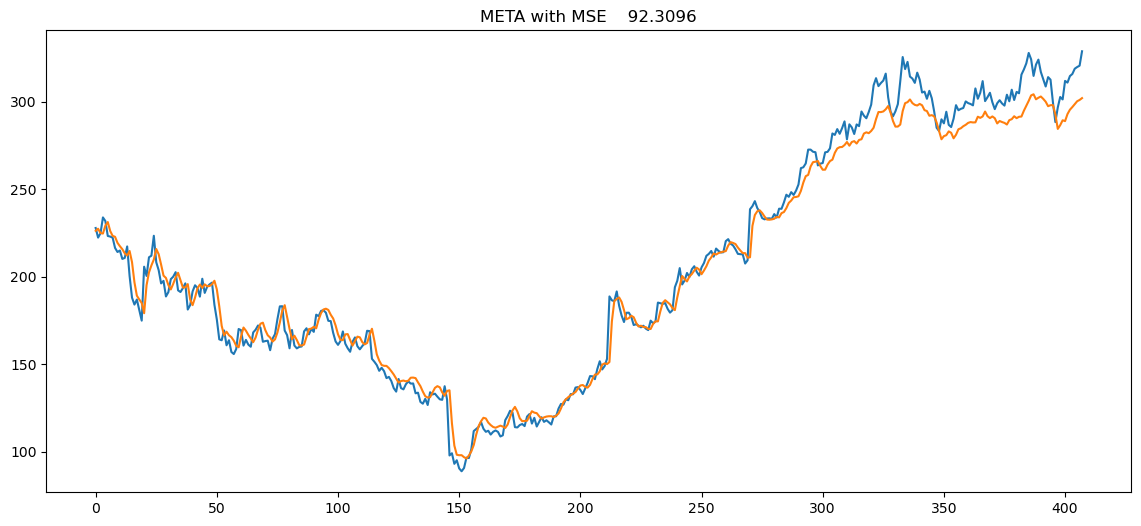

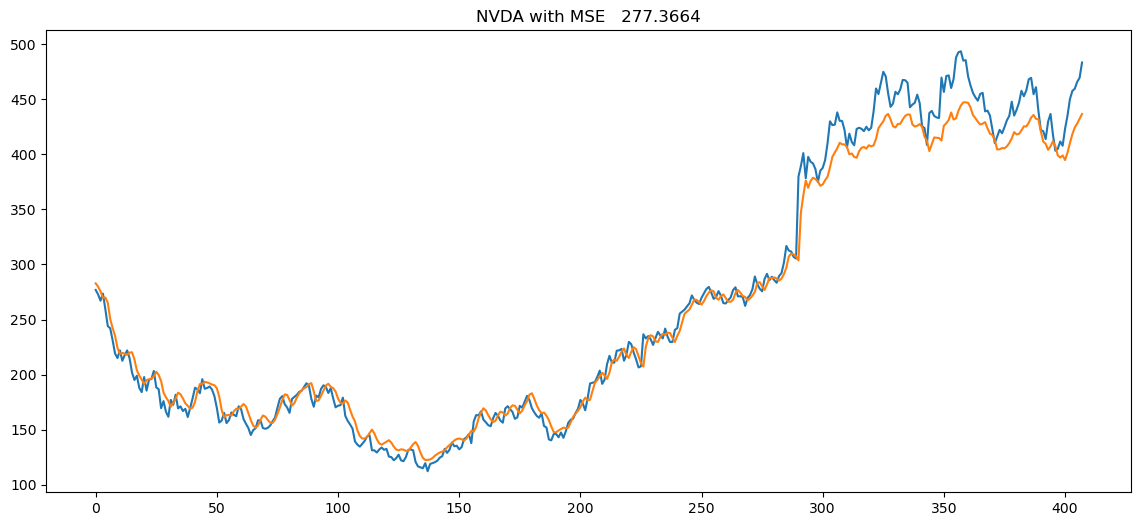

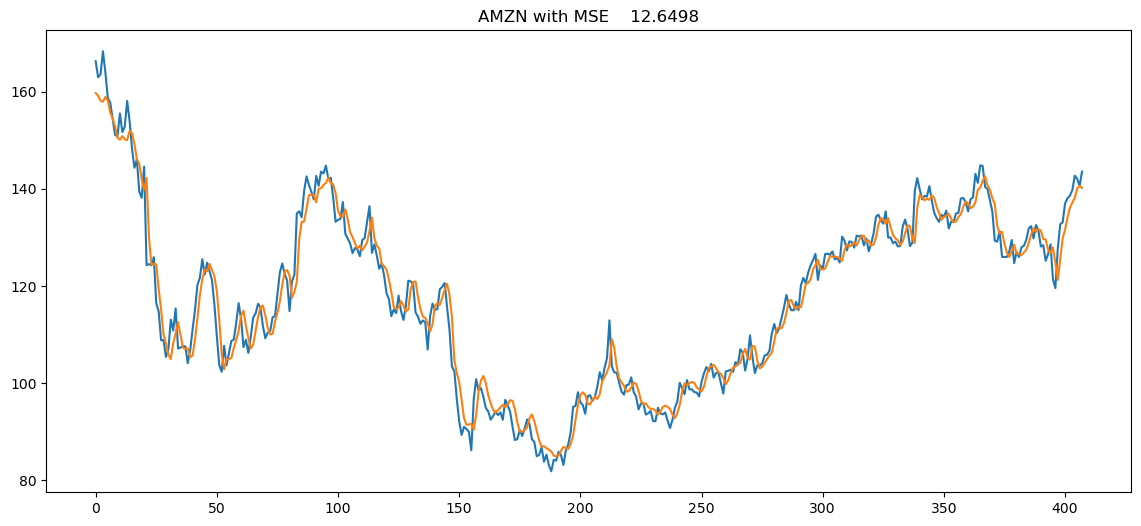

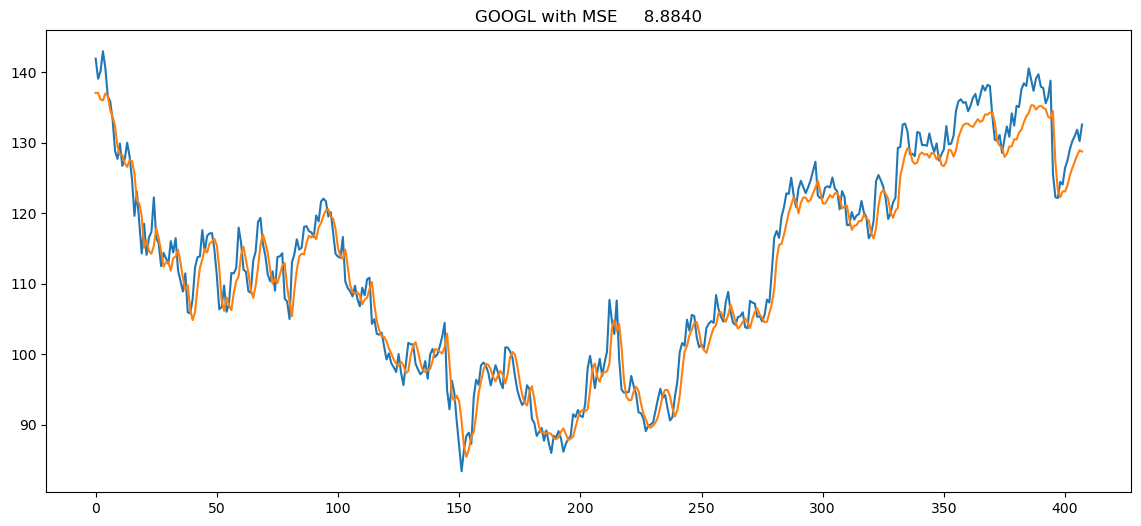

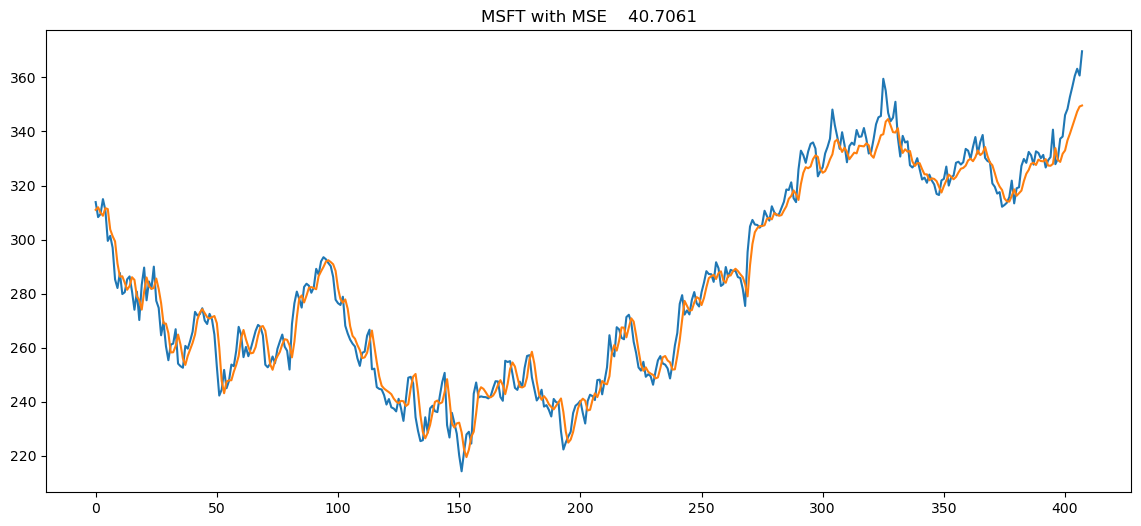

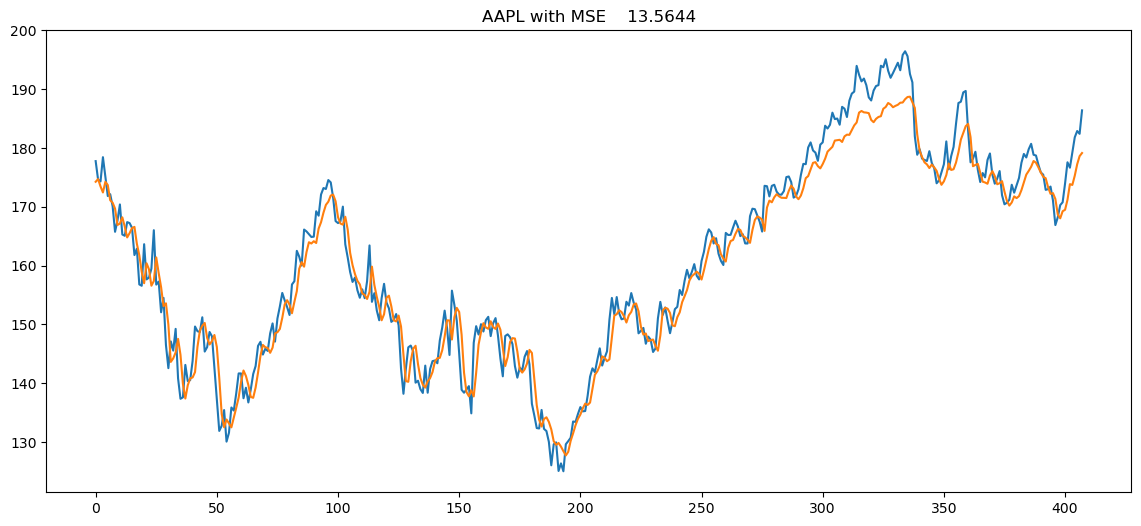

In [ ]:
#We need to print the graph of loss count

pred_result = {}
mse_list=[]
for i in stockList:
    # Scale up to the orignial value
    #print(testset[i]["y"])
    y_true_single_column = testset[i]["y"].reshape(-1, 1)
    #print(y_true_single_column)
    y_true_multiple_columns = np.tile(y_true_single_column, (1, featuresize))
    y_true = scaler[i].inverse_transform(y_true_multiple_columns)
    #print(y_true.shape)
    #y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))           # Convert actual price into a column matrix of whatever the datatype is...
    y_pred_single_column = regressor.predict(testset[i]["X"]) #Use Test set to predict VS Use first input to predict all future output
    y_pred_multiple_columns = np.tile(y_pred_single_column, (1, featuresize))
    y_pred = scaler[i].inverse_transform(y_pred_multiple_columns)

    #y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))      # Predict 1 price based on each set of 60 datas and save it into a column matrix
    #print(y_pred)
    y_real_true = y_true[:,3]                                            # May need to change the column number
    print(y_real_true.shape)
    #print(y_real_true)

    y_real_pred = y_pred[:,3]                                            # May need to change the column number
    print(y_real_pred.shape)



    MSE = mean_squared_error(y_real_true, y_real_pred)
    mse_list.append(MSE)
    pred_result[i] = {}
    pred_result[i]["True"] = y_real_true    # Blue is actual
    pred_result[i]["Pred"] = y_real_pred    # Yellow is predicted

                     # Add Legend later for better illustration in future
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_real_true)
    plt.plot(y_real_pred)

In [ ]:
import csv
import datetime

# Get the current date and time
current_datetime = datetime.datetime.now()

# Create the filename
filename = f"MSE_list/{current_datetime}.csv"

# Save the mse_list to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["MSE"])  # Write the header
    writer.writerows(zip(mse_list))